# DMHR Assignment

## SYSD6 

***

## Importing Useful Libraries Into Python

My first line of code are to import the libraries essential for this project. These include the Numpy, Pandas and Matplotlib libraries for python. 

By importing these libraries as abbreviated terms (e.g. pandas as pd), it is more convinient to access functions and methods fomr them as well as reducing code, making it easier to read when revising or critically evaluating at a later date.

* The numpy library contains many useful methods and functions for mathematical calculations and the manipulation of arrays, for example.


* The Pandas library utilises powerful data structures as well as containing efficient tools for manipulating the data loaded into these. In many cases, manipulation of data using pythons in-built libraries would take minuites, whereas specialised code within the pandas library can carry out what is effectively the same task in a matter of seconds. 


* The Scipy library will be used to conduct linear regressions and provide descriptive statistics to populate visualisations with.


* The matplotlib library contains functions that contribute to a highly flexible and effective platform for the visualisation of data, it can be used in conjunction with other libraries, booth in-built and imported into python (Pandas also incorporates some features from matplotlib). Overall, this provides data scientists with the tools required for creating plots that are  visually pleasing, can convey insights from many differnt types of data and analyse datasets larger than is practical or realistically possible with other commonly used software.
    * '%matplotlib inline' instructs python to produce plots without opening a popup.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

By using an exclamation mark before code, commands form elsewhere in the system can be accessed. The `pip install` command can install external libraries such as `pandasql`.

To install PandaSQL: !pip install pandasql

In [3]:
from pandasql import PandaSQL
pdsql = PandaSQL()

## Reading in the dataframes for this investigation

Reading in first 100 rows of the prescribing dataset in order to guage which columns i will be needing, based on my objectives. 

In [4]:
# Assigning URL to variables as a string, for use
# in reading into pandas dataframes.
url_prescription_data = \
    'https://s3.eu-west-2.amazonaws.com' +\
    '/dmhr-data/prescribing_Dec2015.csv'
    
url_practice_data = \
    'https://s3.eu-west-2.amazonaws.com' +\
    '/dmhr-data/practices_Dec2015.csv'

In [5]:
# Read first 100 rows of prescribing data and present information
# about columns.

pd.read_csv(url_prescription_data, nrows=100).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 SHA                                            100 non-null object
PCT                                             100 non-null object
PRACTICE                                        100 non-null object
BNF CODE                                        100 non-null object
BNF NAME                                        100 non-null object
ITEMS                                           100 non-null int64
NIC                                             100 non-null float64
ACT COST                                        100 non-null float64
QUANTITY                                        100 non-null int64
PERIOD                                          100 non-null int64
                                                100 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 8.7+ KB


I will only need: 

* Practice codes
* Drug names
* Number of prescriptions
* Actual cost of prescriptions
* Quantity of units of a drug prescribed

These correspond to columns with index: 2, 4, 5, 7 and 8.

By including the option `usecols` as equal to a list of the column indexes nessesary, pandas will only read in and create a dataframe restricted to those columns. This will use less RAM as well as allowing the data to be read in faster.

In [6]:
# Assign variable to GP prescribing data, select list of
# columns read to dataframe.

prescribing_data_all = \
    pd.read_csv(url_prescription_data,
                usecols=[2, 4, 5, 7, 8])

Reading in the fist 10 rows of the practice dataset shows that there are not column headers. Also there is a final column with no header or contents.

In [7]:
# Read in first 10 rows from URL and display first 5
pd.read_csv(url_practice_data,
            nrows=10).head()

,201512,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU,
0,201512,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW,...
1,201512,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB,...
2,201512,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,TS1 3BE,...
3,201512,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ,...
4,201512,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AT,...


Reading in only the column headers further reveals that the cells of this dataframe contain large ammounts of whitespace. removing this will reduce memory usage as well as making the data easier to handle.

As this dataset is relatively small I will not exclude any columns, except for the first column, containing the date and the final empty column.

In [8]:
# Read in first 10 rows from URL and display column headers
pd.read_csv(url_practice_data,
            nrows=10).columns

Index(['201512', 'A81001', 'THE DENSHAM SURGERY                     ',
       'THE HEALTH CENTRE        ', 'LAWSON STREET            ',
       'STOCKTON ON TEES         ', 'CLEVELAND                ',
       'TS18 1HU                 ',
       '                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

I have manually added column headers based on the information provided within them.

In [10]:
# Assigning list of column headers for the dataframe to
# to be read in.
practice_columns = ['practice_code', 'practice_name',
                    'building_name', 'street',
                    'city', 'region', 'post_code']

# Read in GP practice dataset into pandas dataframe
# with practice_columns list as headers.
practice_data_all = \
    pd.read_csv(url_practice_data,
                usecols=[1,2,3,4,5,6,7])
    
practice_data_all.columns = practice_columns

practice_data_all.head(2)

,practice_code,practice_name,building_name,street,city,region,post_code
0,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
1,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB


## Cleaning the data

I have defined 3 functions, for the cleaning of these datasets: 
* The first function strips whitespace out of columns headers. 
* The second function strips whitespace form all objects in the data frame, provided they are of the string object type.
* The third and final function comines the previous two.

In [11]:
# Defining a function to remove whiespace form column headers, if
# column header cell contains a string.
def col_tidy(data_frame):
    new_data_columns = []
    for i in data_frame.columns:
        if type(i) == str:
            i = i.strip()
            i = i.lower()
        new_data_columns.append(i)
    data_frame.columns = new_data_columns
    
# Defnining a function to strip whitespace from cells in dataframe
# if those cells contain objects.
# My laptop struggled with object_tidy. It may not be the most 
# efficient code for this purpose.
# An .apply(Lambda) function would be more efficient in this case
def object_tidy(data_frame):
    for i in data_frame:
        if data_frame[i].dtype == object:
            data_frame.loc[:, i] = \
                (data_frame.loc[:, i]).str.strip()
            data_frame.loc[:, i] = \
                (data_frame.loc[:, i]).str.lower()           

# Defining a function that combines the previous two functions to
# clean both column headers and cells form whitespace.
def dataframe_clean(data_frame):
    col_tidy(data_frame)
    object_tidy(data_frame)

The col_tidy function was used on the prescribing data dataframe as the columns contained a large quantity of whitespace. This was simply done to aid my manipulation of this data.

In [12]:
col_tidy(prescribing_data_all)
prescribing_data_all.columns

Index(['practice', 'bnf name', 'items', 'act cost', 'quantity'], dtype='object')

## Subsetting to create new dataframes for the prescription data of Leeds and Cambridge.

One of the first methodologicl problems I have encountered is the definition of which regions consititute as being part of the cities Leeds and Cambridge. Both cities have distinct postcodes, LS and CB, respectively. However, these postcodes extend far beyond what reasonably be considered areas within the two cities. 

Furthermore, if I subset the practice data by rows, for which the region variable contains the city in question it often picks up satellite towns. These towns may or may not be included in Leeds, depending on the definition used. For example, Morely and Bramley, the first two towns in the subset below are towns outside of Leeds. Despite this they are included in the metropolitan borough of Leeds. 

As I have not been briefed on what definition to judge the boundaries of these cities by, I have decided that I will include all practices, for which the city name is included in the city or region. Furthermore, though I will not be using the postcode to filter these out, it will be used as a sanity test to remove any practices that are not in that region of the country. 
* E.g. Some rows in the subset created from the keyword 'leeds' in both the region and city columns gave pracices which were in the PE (Peterborough) postcode area. These will be filtered out.

To do this, I will use .str.contains to assign a boolean value to True to rows containing the city name in either ('|') the region or city columns. case = False, to find strings that contain this word, regardless of case.

The further filtering done by using .str.contains() to remove rows that do not contain the relevant postcode may include irrelevant postcodes if the combination of letters occurs in the postcodes second half. I did not encounter this problem, likely due to the new dataframes being relativley small. If this were a problem I could use a regular expression, such as '^' to specify that I want to only find rows for which the postcode contains the letters at the start.

In [13]:
# Creating a dataframe containing rows that contain the phrase
# 'leeds', case insensitive in either the 'city' or 'region' column
leeds_practices = \
    practice_data_all.loc[practice_data_all['region']\
                          .str.contains('leeds', case=False) | \
                          practice_data_all['city']\
                          .str.contains('leeds', case=False)]

# Further subsetting the leeds practices for rows only containing
# the Leeds postcode as a sanity check.
leeds_practices = \
    leeds_practices.loc[leeds_practices['post_code']\
                            .str.contains('ls', case=False)]

# Process is repeated for Cambridge.
cambridge_practices = \
    practice_data_all.loc[practice_data_all['region']\
                          .str.contains('cambridge', case=False) | \
                          practice_data_all['city']\
                          .str.contains('cambridge', case=False)]
    
cambridge_practices = \
    cambridge_practices.loc[cambridge_practices['post_code']\
                            .str.contains('cb', case=False)]

As the dataframes contained fewer than 200 rows, The max displayed rows and columns were increased to manually check all observations. Here, only the top 5 are displayed as an example.

In [14]:
# Setting options of pandas to display more rows and columns.
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
leeds_practices.head()

,practice_code,practice_name,building_name,street,city,region,post_code
588,B82073,SOUTH MILFORD SURGERY,THE SURGERY,HIGH ST SOUTH MILFORD,LEEDS,,LS25 5AA
768,B86001,DR N SADDIQ'S PRACTICE,MORLEY HEALTH CENTRE,CORPORATION STREET,MORLEY,LEEDS,LS27 9NB
769,B86002,CITY VIEW MEDICAL PRACTICE,BEESTON HILL COMMUNITY HC,123 CEMETERY ROAD,LEEDS,,LS11 8LH
770,B86003,DR G LEES & PARTNERS,ARMLEY MOOR HEALTH CENTRE,95 TOWN STREET,LEEDS,WEST YORKSHIRE,LS12 3HD
771,B86004,HIGHFIELD SURGERY,HIGHFIELD SURGERY,HOLTDALE APPROACH,LEEDS,,LS16 7RX


In [15]:
cambridge_practices.head()

,practice_code,practice_name,building_name,street,city,region,post_code
1534,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH
1535,D81002,HUNTINGDON ROAD SURGERY,HUNTINGDON ROAD SURGERY,1 HUNTINGDON ROAD,CAMBRIDGE,,CB3 0DB
1536,D81003,YORK STREET MEDICAL PRACTICE,YORK STREET MED PRACT.,146-148 YORK STREET,CAMBRIDGE,CAMRIDGESHIRE,CB1 2PY
1538,D81005,NEWNHAM WALK SURGERY,NEWNHAM WALK SURGERY,WORDSWORTH GROVE,CAMBRIDGE,CAMBRIDGESHIRE,CB3 9HS
1541,D81009,SHELFORD MEDICAL PRACTICE,SHELFORD MEDICAL PRACTICE,ASHEN GREEN GRT SHELFORD,CAMBRIDGE,,CB22 5FY


After creating subsets of the practice dataframe, containing practice data for Leeds and Cambridge, I will use practice codes from these to filter prescribing data for the practices.

* Firstly, I will create lists fo the preactice codes for both these cities.
* Next, I will subset the prescribing dataframe based on rows containing these practice codes.

In [16]:
# Converting the 'practice_code' series of both dataframes into a list.
cambridge_practice_codes = list(cambridge_practices['practice_code'])
leeds_practice_codes = list(leeds_practices['practice_code'])

In [17]:
# Subsetting prescribing data based on rows, for which practice code appears
# practice code list of its city. The series are parssed as strings with 
# .contains() function used, case insensitivity is not requuired.
# '|' regex used to join practice lists, as and OR logical.
prescribing_data_leeds = \
    prescribing_data_all.loc[prescribing_data_all['practice']
                             .str.contains('|'.join(leeds_practice_codes))]

prescribing_data_cambridge = \
    prescribing_data_all.loc[prescribing_data_all['practice']
                             .str.contains('|'.join(cambridge_practice_codes))]

***

# Assignment A

## 1. 
By grouping the prescribing data by practice code and applying the .sum() function to it, a new datframe can be made. Here, each practice is reduced to a single row, with the index being its practice code and each column containing the sum of each variable for that practice.

Then, by setting the axis as the practice code, fo the practice dataframes of each city, they can be merged with the new prescribing dataframes for their respective cities.

This produces a dataframe with the details of each practice and its total number of prescriptions, total cost of prescriptions and the total number of units of drugs prescribed.

**The leeds_merged dataframe contains a list of all GP practices in the city of Leeds, along with their total spend on prescriptions ('act cost') and number of unique prescriptions made ('items').**

In [18]:
# Grouping prescribing datafranes by unique objects in 'practice'
# series with integer and float variables summed.
prescribing_data_cambridge_group = \
    prescribing_data_cambridge.groupby('practice').sum()
    
prescribing_data_leeds_group = \
    prescribing_data_leeds.groupby('practice').sum()

In [19]:
# Change index of practice dataframes to practice code to allow for
# merging with prescribing dataframes.
cambridge_practices.set_index('practice_code', inplace=True)
leeds_practices.set_index('practice_code', inplace=True)

In [20]:
cambridge_merged = \
    pd.merge(left=cambridge_practices, \
             right=prescribing_data_cambridge_group, \
             left_index=True, right_index=True)
    
leeds_merged = \
    pd.merge(left=leeds_practices, \
             right=prescribing_data_leeds_group, \
             left_index=True, right_index=True)
    
leeds_merged.head(10)

,practice_name,building_name,street,city,region,post_code,items,act cost,quantity
B82073,SOUTH MILFORD SURGERY,THE SURGERY,HIGH ST SOUTH MILFORD,LEEDS,,LS25 5AA,20733,142642.97,1308737
B86001,DR N SADDIQ'S PRACTICE,MORLEY HEALTH CENTRE,CORPORATION STREET,MORLEY,LEEDS,LS27 9NB,4616,32306.05,286323
B86002,CITY VIEW MEDICAL PRACTICE,BEESTON HILL COMMUNITY HC,123 CEMETERY ROAD,LEEDS,,LS11 8LH,17917,161323.96,1896645
B86003,DR G LEES & PARTNERS,ARMLEY MOOR HEALTH CENTRE,95 TOWN STREET,LEEDS,WEST YORKSHIRE,LS12 3HD,29342,182606.07,1987989
B86004,HIGHFIELD SURGERY,HIGHFIELD SURGERY,HOLTDALE APPROACH,LEEDS,,LS16 7RX,11082,115669.27,1056338
B86005,DR N DUMPHY & PARTNERS,12 OAKLEY TERRACE,BEESTON,LEEDS,,LS11 5HT,7243,62951.42,724076
B86006,DR L FREEMAN & PARTNERS,MARSH STREET SURGERY,25A MARSH ST ROTHWELL,LEEDS,WEST YORKSHIRE,LS26 0AG,20330,191251.96,1963743
B86007,DR J H ROBERTS & PARTNERS,WINDMILL HEALTH CENTRE,MILL GREEN VIEW,LEEDS,,LS14 5JS,18781,133896.17,1425172
B86008,THE SURGERY AT NURSERY LANE AND ADEL,150 NURSERY LANE,,LEEDS,,LS17 7AQ,15638,117606.02,1232096
B86009,MANSTON SURGERY,MANSTON SURGERY,STATION ROAD,LEEDS,,LS15 8BZ,12768,110358.01,1049941


## 2.


The `groupby()` function in pandas can take a column header as an argument and group each unique value in that column into a single row. Here it is used for the `'bnf name'` column, with associated values added up in each of the new rows.

In [21]:
# Grouping prescribing data by drug names. Variables within
# groups added together.
presscribing_data_grouped_drugs_leeds = \
    prescribing_data_leeds.groupby('bnf name').sum()

The top 10 most prescribed drugs across all practices in England:

In [22]:
# Sort dataframe by number of items in descending order.
presscribing_data_grouped_drugs_leeds.sort_values(by='items', 
                                                  ascending=False).head(10)

,items,act cost,quantity
bnf name,,,
Lansoprazole_Cap 30mg (E/C Gran),31252,50034.07,977999
Paracet_Tab 500mg,26122,82986.88,3026627
Simvastatin_Tab 40mg,25360,30934.50,811517
Omeprazole_Cap E/C 20mg,21624,33023.34,837500
Aspirin Disper_Tab 75mg,20982,17669.20,612279
Salbutamol_Inha 100mcg (200 D) CFF,20418,38976.84,27922
Folic Acid_Tab 5mg,15087,13378.56,359699
Amlodipine_Tab 5mg,14903,16572.07,531764
Metformin HCl_Tab 500mg,13801,55469.00,1244175


A list containing the 10 least prescribed drugs would offer little value as there were 1648 drugs prescribed only once in December 2015 in England.

This list may contain different doses of the same drug so it may not accurately how much that particular drug was prescribed in total however.

In [23]:
# Returns the length of series, for which variable in items
# column is equal to 1.
len(presscribing_data_grouped_drugs_leeds.loc\
    [presscribing_data_grouped_drugs_leeds['items'] == 1])

1648

The total cost of the 10 most prescribed drugs in December 2015 was £361,109.49
The total cost of the 1648 drugs only prescribed once was £135,290.24

In [24]:
# Returns the sum of cost for the largest 10 values for items.
sum(presscribing_data_grouped_drugs_leeds\
    .sort_values(by='items', ascending=False).head(10)['act cost'])

361109.48999999999

In [25]:
# Returns the sum of the drugs only prescribed once.
sum(presscribing_data_grouped_drugs_leeds.loc\
    [presscribing_data_grouped_drugs_leeds['items'] == 1]['act cost'])

135290.23999999999

The total spend on prescriptions by all practices in Leeds during this time period is £10,152,241.24
The mean spend was £67,681.60 and the median spend was £48,660.76

In [26]:
# the total spend of all leeds practices
sum(leeds_merged['act cost'])

10152241.239999991

In [27]:
# Returns the mean of cost for all practices in the Leeds
# merged practice dataframe.
np.mean(leeds_merged['act cost'])

67681.6082666666

In [28]:
# Returns the median of cost for all practices in the Leeds
# merged practice dataframe.
np.median(leeds_merged['act cost'])

48660.760000000024

The 1648 least prescribed drugs and 10 most prescribed drugs Leeds accounted for 1.33% and 3.56% of spending, repectively, during December of 2015  

In [29]:
sum(presscribing_data_grouped_drugs_leeds.loc\
    [presscribing_data_grouped_drugs_leeds['items'] == 1]\
    ['act cost'])/sum(leeds_merged['act cost'])*100

1.3326145114337344

In [30]:
sum(presscribing_data_grouped_drugs_leeds\
    .sort_values(by='items', ascending=False).head(10)['act cost'])\
    /sum(leeds_merged['act cost'])*100

3.5569435503287972

## 3.

To show the 10 most expensive prescriptions made in Leeds during December 2015, I first created a new column containing the average cost of each drug prescribed. This values in this column were set as equal to the division of the actual cost by items.

This list may not reflect the cost of the drugs themselves. E.g. the most expensive prescription made in Leeds during this time period is for 'Tocoph Acet_Tab Chble 100mg'. However, 1080 tablets were included in this prescription. Large prescriptions may misrepresnt the cost of what may otherwise cheap drug.

Alternatively I could work out the cost per unit of drug in a prescription. This, however, may also misrepresent the cost of drugs in the data as some drugs, such as methadone are administed in small incraments of 1ml. Due to this, without understanding the standardised dosage per patient, per time period, using 'quantity' to calculate the most/least expensive drugs may cause similar problems.

In [31]:
# Creating a new column, where each variable is total cost/prescriptions
# to give mean cost per prescription of drug.
presscribing_data_grouped_drugs_leeds['cost_per_drug'] = \
    presscribing_data_grouped_drugs_leeds['act cost'] \
    /presscribing_data_grouped_drugs_leeds['items']

With this new column, the dataframe could be sorted by by the cost of the drug in a descending order, with the first 10 values being showed.

In [32]:
# Returns a dataframe with each row representing a drug,
# sorted by mean cost per prescription of drug, in descending order.
presscribing_data_grouped_drugs_leeds.sort_values('cost_per_drug',
                                                  ascending=False).head(10)

,items,act cost,quantity,cost_per_drug
bnf name,,,,
Tocoph Acet_Tab Chble 100mg,1,6147.30,1080,6147.30
Cytomel_Tab 5mcg,1,2945.84,336,2945.84
Trientine Dihydroch_Cap 300mg (Old),1,2583.48,100,2583.48
Ubidecarenone_Liq Spec 25mg/5ml,1,2466.44,700,2466.44
Trihexyphenidyl HCl_Liq Spec 2mg/5ml,1,2401.90,1600,2401.90
Voriconazole_Tab 200mg,2,4078.62,112,2039.31
Posaconazole_Tab 100mg G/R,1,1932.04,84,1932.04
Joulies Phos_Soln 0.98mmol/ml,1,1775.30,2500,1775.30
Sulcrate_Tab 1g,1,1726.14,240,1726.14


## 4.

The average GP practice in Cambridge porduces 29% more prescriptions than the average Leeds practice. As illustrated in the boxplot bellow, this appears to be due to a large number of practices in leeds that made very few prescriptions in December 2015. 

The values for the upper quartiles of prescriptions given out in Leeds and Cambridge GP practices were 14120 and 14512 respectively. This indicates that much of the difference between prescribing between the two cities does come from a large number of practices in Leeds that do not make many prescriptions as opposed to a substantial number of practices in Cambridge that provide a larger than average number of prescriptions.

In [33]:
print('Mean number of prescriptions made in Leeds GP preactices: %.2f'
      % np.mean(prescribing_data_leeds_group['items']))
print('Mean number of prescriptions made in Cambridge GP preactices: %.2f'
      % np.mean(prescribing_data_cambridge_group['items']))

print('\nMean spend per prescription in Leeds GP preactices: £%.2f'
      % (np.mean(prescribing_data_leeds_group['act cost'])\
      / np.mean(prescribing_data_leeds_group['items'])))
print('Mean spend per prescription in Cambridge GP preactices: £%.2f'
      % (np.mean(prescribing_data_cambridge_group['act cost'])\
      / np.mean(prescribing_data_cambridge_group['items'])))

Mean number of prescriptions made in Leeds GP preactices: 8550.97
Mean number of prescriptions made in Cambridge GP preactices: 10997.66

Mean spend per prescription in Leeds GP preactices: £7.92
Mean spend per prescription in Cambridge GP preactices: £7.27


C:\Users\Khaled\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


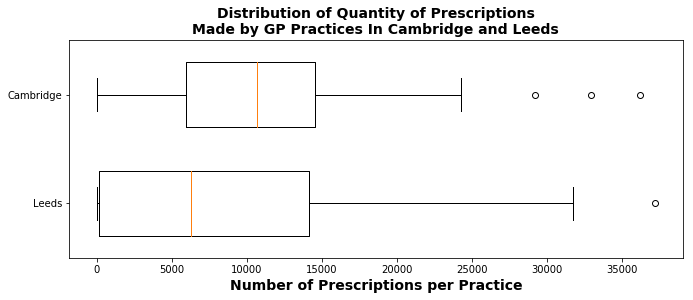

In [34]:
# Creates a dictionary for font options in plot.
bold_dict = {'size': 14,
             'weight': 'bold'}

# Returns matplotlib boxplot comparing the distribution of GP practices
# in Cambridge and Leeds by number of prescriptions made
plt.boxplot([prescribing_data_leeds_group['items'],
             prescribing_data_cambridge_group['items']],
            labels = ['Leeds', 'Cambridge'],
            vert = False,
            widths = 0.6)
plt.title('Distribution of Quantity of Prescriptions\nMade by GP Practices ' +
          'In Cambridge and Leeds', fontdict=bold_dict)
plt.xlabel('Number of Prescriptions per Practice', fontdict=bold_dict)
plt.gcf().set_size_inches(11,4)

In [35]:
print('The 75th percentile of prescriptions per practice for Leeds was: %d'
      % np.percentile(prescribing_data_leeds_group['items'], 75))
print('The 75th percentile of prescriptions per practice for Cambridge was: %d'
      % np.percentile(prescribing_data_cambridge_group['items'], 75))

The 75th percentile of prescriptions per practice for Leeds was: 14120
The 75th percentile of prescriptions per practice for Cambridge was: 14512


The distribution of GP practices relative cost per prescription, for both Leeds and Cambridge differ in that there is a greater range for Leeds practices. There are also several outliers in the Leeds practices, with a high spend per prescription that skew the data.

In [36]:
# Creates a numpy array called <city>_spend_prescription, where each
# each value is the relative cost per prescription for a practice.
leeds_spend_prescription = \
    np.array(prescribing_data_leeds_group['act cost'] /
             prescribing_data_leeds_group['items'])

cambridge_spend_prescription = \
    np.array(prescribing_data_cambridge_group['act cost'] /
             prescribing_data_cambridge_group['items'])

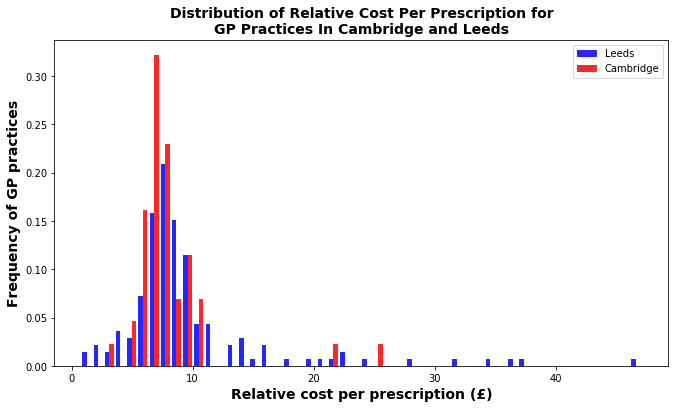

In [37]:
# Plots a histogram representing the distribution of the relative costs
# per prescription in Leeds and Cambridge.
# Arranged in to 50 bins of equal width.
# Data is normalised as the absolute frequency of Leeds is higher
# due to having more data.
bold_dict = {'size': 14,
             'weight': 'bold'}
plt.hist([leeds_spend_prescription, cambridge_spend_prescription],
         50, alpha=0.85,  color=['b', 'r'],
         label=['Leeds', 'Cambridge'], normed=True)
plt.title('Distribution of Relative Cost Per Prescription for\nGP Practices ' +
          'In Cambridge and Leeds', fontdict=bold_dict)
plt.legend()
plt.xlabel('Relative cost per prescription (£)', fontdict=bold_dict)
plt.ylabel('Frequency of GP practices', fontdict=bold_dict)

plt.gcf().set_size_inches(11,6)

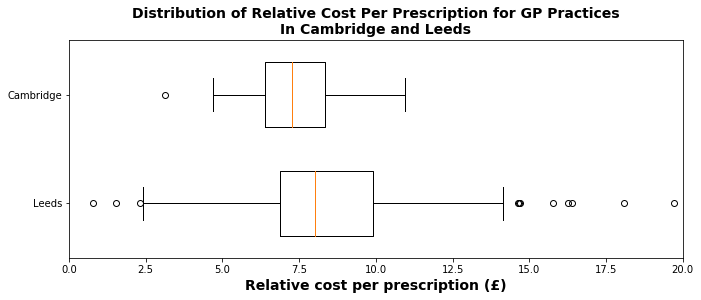

In [38]:
# Horizontal boxplot, illustrating distribution of <city>_spend_prescription
# arrays for Leeds and Cambridge data.
bold_dict = {'size': 14,
             'weight': 'bold'}
plt.boxplot([leeds_spend_prescription, cambridge_spend_prescription],
            labels=['Leeds', 'Cambridge'],
            vert=False, widths=0.6)
plt.title('Distribution of Relative Cost Per Prescription for GP Practices\n' +
          'In Cambridge and Leeds', fontdict=bold_dict)
plt.xlabel('Relative cost per prescription (£)', fontdict=bold_dict)
plt.xlim(0,20)
plt.gcf().set_size_inches(11,4)

## 5.

In this SQL query, practice codes were counted by grouped cities and regions, as many practices in the `practice_data_all` dataframe have their city value stored as a region and vice versa. Practices are then ordered by their count in a descending order.

For both practice lists grouped by city and region, the modal category was a blank string, i.e. there were more practices, for which this data wsa missing than the next highest city/region. To show the top 10 in descending order, index based positions were used to take a slice of indexes 1 to 10, with a all columns (city first, then count). Simply removing the `.iloc` function form this code will produce a table of practice counts from this query.

In [39]:
print(pdsql("SELECT COUNT(practice_code), city\
       FROM practice_data_all\
       GROUP BY city\
       ORDER BY COUNT(practice_code)\
       DESC", locals()).iloc[1:11, [1, 0]])

                         city  COUNT(practice_code)
1   BIRMINGHAM                                  173
2   LIVERPOOL                                   137
3   LEEDS                                       122
4   MANCHESTER                                  117
5   SHEFFIELD                                   105
6   BRISTOL                                      95
7   COVENTRY                                     95
8   LONDON                                       92
9   BRADFORD                                     85
10  LEICESTER                                    84


In [40]:
print(pdsql("SELECT COUNT(practice_code), region\
       FROM practice_data_all\
       GROUP BY region\
       ORDER BY COUNT(practice_code)\
       DESC", locals()).iloc[1:11, [1, 0]])

                       region  COUNT(practice_code)
1   LONDON                                      869
2   ESSEX                                       410
3   KENT                                        398
4   LANCASHIRE                                  339
5   WEST MIDLANDS                               314
6   SURREY                                      278
7   MIDDLESEX                                   245
8   WEST YORKSHIRE                              234
9   CHESHIRE                                    213
10  HAMPSHIRE                                   184


***








# Assignment B

## 1.

By merging national prescribing data (grouped by practice code) with national practice data, the new `all_practices_merged` dataframe contains the total spending for each practice in England, under the 'act cost' column header.

In [41]:
# Creating a new dataframe from prescribing data, grouped by
# practice, with numberical variables within group added.
prescribing_data_all_grouped = \
    prescribing_data_all.groupby('practice').sum()

# Merging this new dataframe with practice data(with practice
# code as its index).
all_practices_merged = \
    pd.merge(left=practice_data_all.set_index('practice_code'),
            right = prescribing_data_all_grouped,
            left_index=True, right_index=True)

all_practices_merged.head()

,practice_name,building_name,street,city,region,post_code,items,act cost,quantity
A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW,38615,333514.67,3051566
A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB,8062,47977.16,516760
A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,TS1 3BE,16418,147494.85,1485240
A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ,16648,107669.51,930178
A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AT,26544,197436.78,1891777


In [42]:
print('The total number of prescriptions given out in England during December 2015'
       + ' is: ' + str(sum(prescribing_data_all_grouped['items'])) 
      
      + '\n\nThe total spent on prescriptions during this time period is: £'
      + str(sum(prescribing_data_all_grouped['act cost']))
     
      + '\n\nThe mean number of prescriptions given out by GP practices in England was: ' 
      + str(int(np.mean(prescribing_data_all_grouped['items'])))
      
      + '\n\nThe median number of prescriptions given out by GP practices in England was: '
      + str(np.median(prescribing_data_all_grouped['items']))
     )

The total number of prescriptions given out in England during December 2015 is: 96091307

The total spent on prescriptions during this time period is: £762652369.8

The mean number of prescriptions given out by GP practices in England was: 9700

The median number of prescriptions given out by GP practices in England was: 7874.0


## 2.

In order to calculate the mean cost per patient for each practice, the HSCIC GP demographic information dataset was imported intp a Pandas data frame. Setting the index of this dataframe as being the practice code, allowed for it to be easily merged with the practice dataframe (also with practice codes as its index).

The all_practices_with_demo dataframe

In [43]:
# Reading the GP practice demographic data as a pandas dataframe 'demo_data'
# with GP practice code as index.
demo_data = pd.read_csv('https://digital.nhs.uk/media/28273/Numbers-of-' +
                        'Patients-Registered-at-a-GP-Practice-Jan-2016-GP-' +
                        'Practice-and-quinary-age-groups/Any/gp-reg-patients' +
                        '-prac-quin-age', index_col=[0])

In [44]:
# Merging GP practice dataframe with demographic data.
all_practices_with_demo = \
    pd.merge(left=all_practices_merged,
            right = demo_data, 
            left_index=True, right_index=True)
    
all_practices_with_demo.head()

,practice_name,building_name,street,city,region,post_code,items,act cost,quantity,POSTCODE,ONS_CCG_CODE,CCG_CODE,ONS_REGION_CODE,NHSE_REGION_CODE,ONS_COMM_RGN_CODE,NHSE_COMM_REGION_CODE,Total_All,Total_Male,Total_Female,Male_0-4,Male_5-9,Male_10-14,Male_15-19,Male_20-24,Male_25-29,Male_30-34,Male_35-39,Male_40-44,Male_45-49,Male_50-54,Male_55-59,Male_60-64,Male_65-69,Male_70-74,Male_75-79,Male_80-84,Male_85-89,Male_90-94,Male_95+,Female_0-4,Female_5-9,Female_10-14,Female_15-19,Female_20-24,Female_25-29,Female_30-34,Female_35-39,Female_40-44,Female_45-49,Female_50-54,Female_55-59,Female_60-64,Female_65-69,Female_70-74,Female_75-79,Female_80-84,Female_85-89,Female_90-94,Female_95+
A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW,38615,333514.67,3051566,TS18 2AW,E38000075,00K,E39000027,Q74,E40000001,Y54,19691,9706,9985,501,549,501,555,617,660,585,501,520,704,831,726,590,625,426,328,269,156,49,13,517,544,448,484,602,635,568,476,522,704,833,733,634,636,483,445,362,231,106,22
A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB,8062,47977.16,516760,TS26 8DB,E38000075,00K,E39000027,Q74,E40000001,Y54,3357,1779,1578,83,110,113,103,120,135,102,104,124,126,114,137,115,114,68,55,34,21,1,0,90,90,104,118,138,97,80,89,92,118,113,100,91,94,49,44,38,18,13,2
A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,TS1 3BE,16418,147494.85,1485240,TS1 3BE,E38000162,00M,E39000027,Q74,E40000001,Y54,9151,4774,4377,233,218,215,323,547,394,316,284,266,315,301,326,255,223,175,160,120,74,21,8,194,224,228,261,486,282,254,214,237,239,277,265,261,228,205,210,165,91,39,17
A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ,16648,107669.51,930178,TS14 7DJ,E38000162,00M,E39000027,Q74,E40000001,Y54,7883,3826,4057,189,201,183,177,197,181,195,217,255,246,257,274,293,327,254,165,119,70,20,6,182,223,199,165,180,182,195,224,236,278,287,280,309,368,253,183,144,102,47,20
A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AT,26544,197436.78,1891777,TS18 2AT,E38000075,00K,E39000027,Q74,E40000001,Y54,12345,6005,6340,373,377,367,344,380,410,348,331,363,449,462,433,368,364,246,178,134,58,16,4,356,362,321,345,372,392,439,341,364,423,497,463,390,409,290,238,184,97,41,16


Many of the columns from the practice and demographic data are not informative when investigating the total number of patients registered at each practice and their average cost of prescriptions. By removing unecessary columns, the data is clearer and easier to interpret.

Using the `np.r_` method to concatenate a combination of indexes and slices, the `all_practices_cost_per_patient` variable was reassigned to a copy of itself, excluding irrelevant columns. This left only columns 0, 3, 5, 6, 7, 8, 16

In [45]:
# Subsetting the practice + demographic dataframe, to only include
# variables relevant to this analysis. Assigning this subset
# to 'all_practices_cost_per_patient'
all_practices_cost_per_patient = \
    all_practices_with_demo.iloc[:, np.r_[0, 3,5:9,16]]
all_practices_cost_per_patient.head()

,practice_name,city,post_code,items,act cost,quantity,Total_All
A81002,QUEENS PARK MEDICAL CENTRE,STOCKTON ON TEES,TS18 2AW,38615,333514.67,3051566,19691
A81003,VICTORIA MEDICAL PRACTICE,HARTLEPOOL,TS26 8DB,8062,47977.16,516760,3357
A81004,WOODLANDS ROAD SURGERY,MIDDLESBROUGH,TS1 3BE,16418,147494.85,1485240,9151
A81005,SPRINGWOOD SURGERY,GUISBOROUGH,TS14 7DJ,16648,107669.51,930178,7883
A81006,TENNANT STREET MEDICAL PRACTICE,STOCKTON ON TEES,TS18 2AT,26544,197436.78,1891777,12345


In [46]:
# Dividing cost by number of registered patitents to return a series
# of relative cost per patient for corresponding GP Practices.
# Assigned to new column 'cost_per_patient'
all_practices_cost_per_patient['cost_per_patient'] = \
    all_practices_cost_per_patient['act cost'] \
    /all_practices_cost_per_patient['Total_All']

all_practices_cost_per_patient.head()

C:\Users\Khaled\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,practice_name,city,post_code,items,act cost,quantity,Total_All,cost_per_patient
A81002,QUEENS PARK MEDICAL CENTRE,STOCKTON ON TEES,TS18 2AW,38615,333514.67,3051566,19691,16.937417
A81003,VICTORIA MEDICAL PRACTICE,HARTLEPOOL,TS26 8DB,8062,47977.16,516760,3357,14.291677
A81004,WOODLANDS ROAD SURGERY,MIDDLESBROUGH,TS1 3BE,16418,147494.85,1485240,9151,16.117894
A81005,SPRINGWOOD SURGERY,GUISBOROUGH,TS14 7DJ,16648,107669.51,930178,7883,13.658443
A81006,TENNANT STREET MEDICAL PRACTICE,STOCKTON ON TEES,TS18 2AT,26544,197436.78,1891777,12345,15.993259


In [47]:
print('The mean cost of prescriptions per patient in England during December 2015 was: £%.2f' \
      % np.mean(all_practices_cost_per_patient['cost_per_patient']))

The mean cost of prescriptions per patient in England during December 2015 was: £21.32


## 3.

To compare the cost per patient in Leeds GP practices, the all_practices_cost_per_patient dataframe was reindexed to move practice codes into a column and then subsetted based on rows that contained practice codes in Leeds.

Both dataframes had their indexes reset to be the practice codes for each practice.

There is a very strong correlation between number of patients registered at a GP practice and how much it spends on prescriptions for both England as a whole (r² = 0.769) and Leeds (r² = 0.560). The national correlation coefficient is higher than that of Leeds, though this could be to more data points reducing the effect of outliers.

The `stats.linregress()` function of `scipy` returns a special type of list, containing descriptive statistics on the linear regression of two variables from a dataset.

In [48]:
all_practices_cost_per_patient.reset_index(inplace=True)

leeds_practices_cost_per_patient = \
    all_practices_cost_per_patient.loc[all_practices_cost_per_patient['index']
                                       .str.contains
                                       ('|'.join(leeds_practice_codes))]

all_practices_cost_per_patient.set_index('index', inplace=True)
leeds_practices_cost_per_patient.set_index('index', inplace=True)

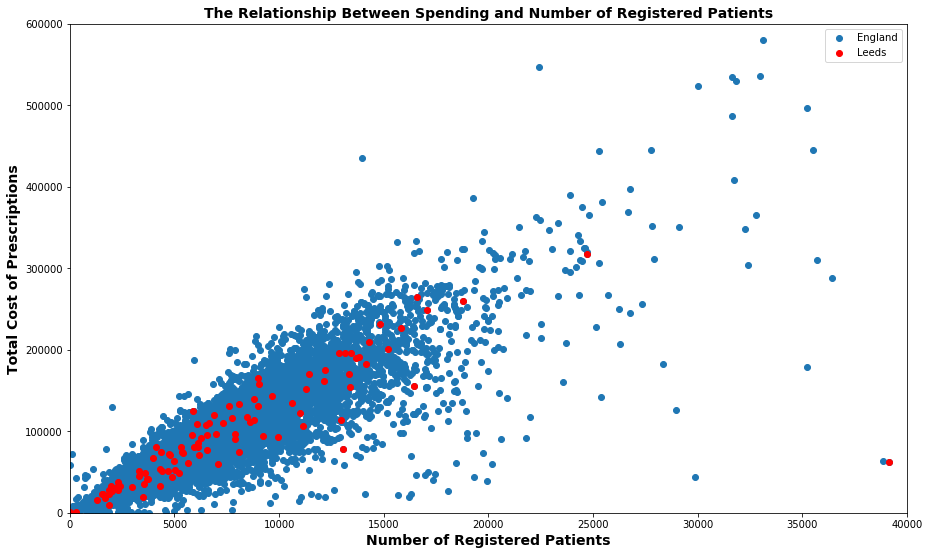

In [49]:
# Assigning the 'get current figure' function of matplotlib as axes
axes = plt.gcf()

bold_dict = {'size': 14,
             'weight': 'bold'}

# Creating two scatter plots, with total number of registered patients
# per practice, plotted against total spend per practice.
plt.scatter(all_practices_cost_per_patient['Total_All'],
            all_practices_cost_per_patient['act cost'],
            marker='o')
plt.scatter(leeds_practices_cost_per_patient['Total_All'],
            leeds_practices_cost_per_patient['act cost'],
            color='r', marker='o')

plt.legend(['England', 'Leeds'])
plt.ylim(0,600000)
plt.xlim(0,40000)
plt.title('The Relationship Between Spending and ' +
          'Number of Registered Patients', fontdict=bold_dict)
plt.xlabel('Number of Registered Patients', fontdict=bold_dict)
plt.ylabel('Total Cost of Prescriptions', fontdict=bold_dict)

axes.set_size_inches(15,9)

In [50]:
# stats.linregress()[2] returns the correlation coefficient for
# these data. Their exponents of 2 gives the r² values.
regress_england = \
    stats.linregress(all_practices_cost_per_patient['Total_All'],
                     all_practices_cost_per_patient['act cost'])\
                     [2] ** 2

regress_leeds = \
    stats.linregress(leeds_practices_cost_per_patient['Total_All'],
                     leeds_practices_cost_per_patient['act cost'])\
                     [2] ** 2

print('England r² = %.3f\nLeeds r² = %.3f' % (regress_england, regress_leeds))

England r² = 0.769
Leeds r² = 0.560


## 4.

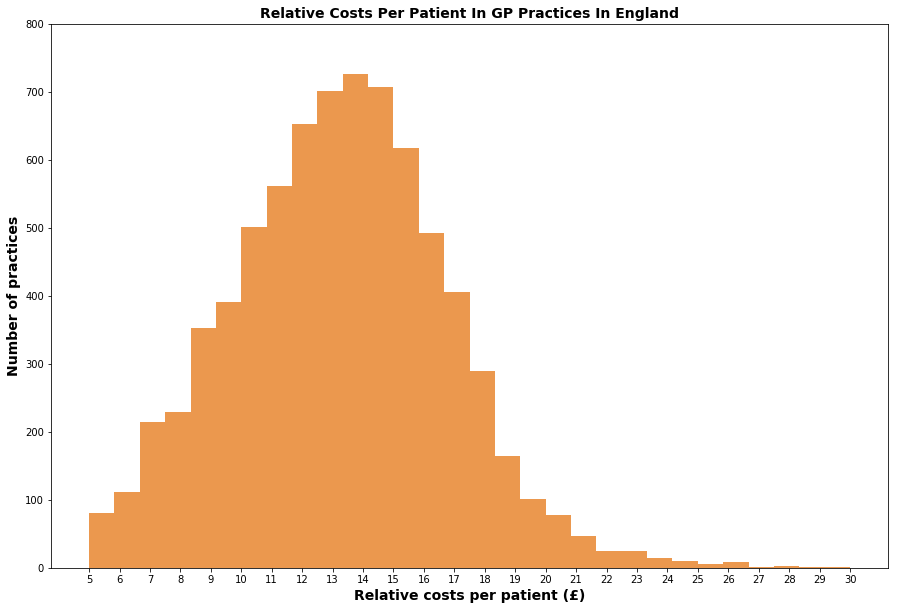

In [51]:
axes = plt.gcf()

bold_dict = {'size': 14,
             'weight': 'bold'}

plt.hist(all_practices_cost_per_patient['cost_per_patient'],
         range=(5, 30), bins = 30, color='#E67E22', alpha=0.8)

plt.title('Relative Costs Per Patient In GP Practices In England',
          fontdict=bold_dict)
plt.xticks(range(5,31))
plt.xlabel('Relative costs per patient (£)', fontdict=bold_dict)
plt.ylabel('Number of practices', fontdict=bold_dict)
plt.ylim(0,800)
axes.set_size_inches(15,10)

## 5.

To create a Leeds specific dataframe containing basic information about practices as well as their demographic data, a subset was created from the all_practices_with_demo dataframe. The .ix() method was used to select rows, for which the practice code contained within was of a Leeds GP practice.

Alomost all of the practices with codes that began with the letter 'Y' were not referenced in the demographic data, therefore the columns could not previously have been merged and they contain Not a Number (NaN) as each variable.

To remove practices with no data, the .dropna() method will be used. As the columns with missing data are missing data from all columns, I will tell the function to only drop rows for which all values are missing, so as not to remove any rows that might only be missing a small number of variables. 

In [52]:
leeds_practices_with_demo  = \
    all_practices_with_demo.ix[leeds_practice_codes]
leeds_practices_with_demo

C:\Users\Khaled\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,practice_name,building_name,street,city,region,post_code,items,act cost,quantity,POSTCODE,ONS_CCG_CODE,CCG_CODE,ONS_REGION_CODE,NHSE_REGION_CODE,ONS_COMM_RGN_CODE,NHSE_COMM_REGION_CODE,Total_All,Total_Male,Total_Female,Male_0-4,Male_5-9,Male_10-14,Male_15-19,Male_20-24,Male_25-29,Male_30-34,Male_35-39,Male_40-44,Male_45-49,Male_50-54,Male_55-59,Male_60-64,Male_65-69,Male_70-74,Male_75-79,Male_80-84,Male_85-89,Male_90-94,Male_95+,Female_0-4,Female_5-9,Female_10-14,Female_15-19,Female_20-24,Female_25-29,Female_30-34,Female_35-39,Female_40-44,Female_45-49,Female_50-54,Female_55-59,Female_60-64,Female_65-69,Female_70-74,Female_75-79,Female_80-84,Female_85-89,Female_90-94,Female_95+
B82073,SOUTH MILFORD SURGERY,THE SURGERY,HIGH ST SOUTH MILFORD,LEEDS,,LS25 5AA,20733.0,142642.97,1308737.0,LS25 5AA,E38000188,03Q,E39000029,Q72,E40000001,Y54,9670.0,4806.0,4864.0,276.0,276.0,270.0,222.0,221.0,267.0,288.0,340.0,366.0,344.0,389.0,336.0,336.0,314.0,245.0,150.0,103.0,46.0,15.0,2.0,270.0,267.0,248.0,227.0,228.0,273.0,281.0,311.0,348.0,366.0,375.0,325.0,315.0,340.0,244.0,174.0,146.0,79.0,36.0,11.0
B86001,DR N SADDIQ'S PRACTICE,MORLEY HEALTH CENTRE,CORPORATION STREET,MORLEY,LEEDS,LS27 9NB,4616.0,32306.05,286323.0,LS27 9NB,E38000096,03C,E39000029,Q72,E40000001,Y54,2405.0,1353.0,1052.0,60.0,54.0,63.0,50.0,68.0,91.0,135.0,114.0,133.0,99.0,103.0,93.0,76.0,69.0,66.0,41.0,25.0,9.0,4.0,0.0,44.0,48.0,43.0,52.0,79.0,76.0,85.0,77.0,65.0,65.0,66.0,72.0,56.0,58.0,63.0,29.0,40.0,24.0,8.0,2.0
B86002,CITY VIEW MEDICAL PRACTICE,BEESTON HILL COMMUNITY HC,123 CEMETERY ROAD,LEEDS,,LS11 8LH,17917.0,161323.96,1896645.0,LS11 8LH,E38000095,03G,E39000029,Q72,E40000001,Y54,12151.0,6570.0,5581.0,538.0,483.0,354.0,359.0,434.0,621.0,697.0,687.0,525.0,457.0,401.0,278.0,217.0,182.0,128.0,104.0,60.0,33.0,7.0,5.0,491.0,457.0,335.0,343.0,456.0,554.0,564.0,411.0,350.0,310.0,278.0,229.0,169.0,180.0,133.0,111.0,101.0,64.0,33.0,12.0
B86003,DR G LEES & PARTNERS,ARMLEY MOOR HEALTH CENTRE,95 TOWN STREET,LEEDS,WEST YORKSHIRE,LS12 3HD,29342.0,182606.07,1987989.0,LS12 3HD,E38000096,03C,E39000029,Q72,E40000001,Y54,14149.0,7143.0,7006.0,574.0,499.0,366.0,370.0,428.0,645.0,756.0,614.0,549.0,525.0,483.0,373.0,297.0,241.0,155.0,105.0,98.0,41.0,20.0,4.0,534.0,494.0,375.0,389.0,521.0,779.0,739.0,518.0,424.0,470.0,411.0,281.0,243.0,249.0,155.0,150.0,139.0,88.0,32.0,15.0
B86004,HIGHFIELD SURGERY,HIGHFIELD SURGERY,HOLTDALE APPROACH,LEEDS,,LS16 7RX,11082.0,115669.27,1056338.0,LS16 7RX,E38000096,03C,E39000029,Q72,E40000001,Y54,7762.0,3851.0,3911.0,201.0,218.0,220.0,225.0,200.0,275.0,277.0,274.0,240.0,280.0,267.0,252.0,231.0,236.0,155.0,130.0,92.0,53.0,17.0,8.0,214.0,196.0,184.0,207.0,220.0,257.0,232.0,221.0,226.0,271.0,264.0,282.0,269.0,249.0,157.0,173.0,126.0,105.0,47.0,11.0
B86005,DR N DUMPHY & PARTNERS,12 OAKLEY TERRACE,BEESTON,LEEDS,,LS11 5HT,7243.0,62951.42,724076.0,LS11 5HT,E38000095,03G,E39000029,Q72,E40000001,Y54,4992.0,2657.0,2335.0,157.0,176.0,139.0,137.0,207.0,224.0,300.0,196.0,198.0,201.0,203.0,145.0,108.0,94.0,62.0,45.0,37.0,17.0,10.0,1.0,174.0,137.0,138.0,145.0,190.0,203.0,198.0,150.0,167.0,151.0,152.0,117.0,84.0,91.0,64.0,54.0,60.0,40.0,17.0,3.0
B86006,DR L FREEMAN & PARTNERS,MARSH STREET SURGERY,25A MARSH ST ROTHWELL,LEEDS,WEST YORKSHIRE,LS26 0AG,20330.0,191251.96,1963743.0,LS26 0AG,E38000095,03G,E39000029,Q72,E40000001,Y54,13807.0,6621.0,7186.0,405.0,433.0,388.0,430.0,361.0,399.0,425.0,427.0,465.0,574.0,530.0,396.0,351.0,317.0,287.0,199.0,143.0,70.0,16.0,5.0,390.0,428.0,441.0,358.0,395.0,418.0,446.0,465.0,546.0,622.0,548.0,423.0,382.0,402.0,316.0,245.0,190.0,116.0,45.0,10.0
B86007,DR J H ROBERTS & PARTNERS,WINDMILL HEALTH CENTRE,MILL GREEN VIEW,LEEDS,,LS14 5JS,18781.0,133896.17,1425172.0,LS14 5JS,E38000095,03G,E39000029,Q72,E40000001,Y54,8108.0,4038.0,4070.0,248.0,298.0,249.0,263.0,287.0,323.0,304.0,227.0,262.0,319.0,281.0,226.0,221.0,207.0,125.0,81.0,70.0,39.0,6.0,2.0,244.0,241.0,187.0,242.0,314.0,315.0,274.0,215.0,203.0,332.0,286.0,279.0,223.0,200.0,166.0,130.0,96.0,83.0,31.0,9

In [53]:
leeds_practices_with_demo.dropna(axis=0, how='all', inplace=True)
leeds_practices_with_demo

,practice_name,building_name,street,city,region,post_code,items,act cost,quantity,POSTCODE,ONS_CCG_CODE,CCG_CODE,ONS_REGION_CODE,NHSE_REGION_CODE,ONS_COMM_RGN_CODE,NHSE_COMM_REGION_CODE,Total_All,Total_Male,Total_Female,Male_0-4,Male_5-9,Male_10-14,Male_15-19,Male_20-24,Male_25-29,Male_30-34,Male_35-39,Male_40-44,Male_45-49,Male_50-54,Male_55-59,Male_60-64,Male_65-69,Male_70-74,Male_75-79,Male_80-84,Male_85-89,Male_90-94,Male_95+,Female_0-4,Female_5-9,Female_10-14,Female_15-19,Female_20-24,Female_25-29,Female_30-34,Female_35-39,Female_40-44,Female_45-49,Female_50-54,Female_55-59,Female_60-64,Female_65-69,Female_70-74,Female_75-79,Female_80-84,Female_85-89,Female_90-94,Female_95+
B82073,SOUTH MILFORD SURGERY,THE SURGERY,HIGH ST SOUTH MILFORD,LEEDS,,LS25 5AA,20733.0,142642.97,1308737.0,LS25 5AA,E38000188,03Q,E39000029,Q72,E40000001,Y54,9670.0,4806.0,4864.0,276.0,276.0,270.0,222.0,221.0,267.0,288.0,340.0,366.0,344.0,389.0,336.0,336.0,314.0,245.0,150.0,103.0,46.0,15.0,2.0,270.0,267.0,248.0,227.0,228.0,273.0,281.0,311.0,348.0,366.0,375.0,325.0,315.0,340.0,244.0,174.0,146.0,79.0,36.0,11.0
B86001,DR N SADDIQ'S PRACTICE,MORLEY HEALTH CENTRE,CORPORATION STREET,MORLEY,LEEDS,LS27 9NB,4616.0,32306.05,286323.0,LS27 9NB,E38000096,03C,E39000029,Q72,E40000001,Y54,2405.0,1353.0,1052.0,60.0,54.0,63.0,50.0,68.0,91.0,135.0,114.0,133.0,99.0,103.0,93.0,76.0,69.0,66.0,41.0,25.0,9.0,4.0,0.0,44.0,48.0,43.0,52.0,79.0,76.0,85.0,77.0,65.0,65.0,66.0,72.0,56.0,58.0,63.0,29.0,40.0,24.0,8.0,2.0
B86002,CITY VIEW MEDICAL PRACTICE,BEESTON HILL COMMUNITY HC,123 CEMETERY ROAD,LEEDS,,LS11 8LH,17917.0,161323.96,1896645.0,LS11 8LH,E38000095,03G,E39000029,Q72,E40000001,Y54,12151.0,6570.0,5581.0,538.0,483.0,354.0,359.0,434.0,621.0,697.0,687.0,525.0,457.0,401.0,278.0,217.0,182.0,128.0,104.0,60.0,33.0,7.0,5.0,491.0,457.0,335.0,343.0,456.0,554.0,564.0,411.0,350.0,310.0,278.0,229.0,169.0,180.0,133.0,111.0,101.0,64.0,33.0,12.0
B86003,DR G LEES & PARTNERS,ARMLEY MOOR HEALTH CENTRE,95 TOWN STREET,LEEDS,WEST YORKSHIRE,LS12 3HD,29342.0,182606.07,1987989.0,LS12 3HD,E38000096,03C,E39000029,Q72,E40000001,Y54,14149.0,7143.0,7006.0,574.0,499.0,366.0,370.0,428.0,645.0,756.0,614.0,549.0,525.0,483.0,373.0,297.0,241.0,155.0,105.0,98.0,41.0,20.0,4.0,534.0,494.0,375.0,389.0,521.0,779.0,739.0,518.0,424.0,470.0,411.0,281.0,243.0,249.0,155.0,150.0,139.0,88.0,32.0,15.0
B86004,HIGHFIELD SURGERY,HIGHFIELD SURGERY,HOLTDALE APPROACH,LEEDS,,LS16 7RX,11082.0,115669.27,1056338.0,LS16 7RX,E38000096,03C,E39000029,Q72,E40000001,Y54,7762.0,3851.0,3911.0,201.0,218.0,220.0,225.0,200.0,275.0,277.0,274.0,240.0,280.0,267.0,252.0,231.0,236.0,155.0,130.0,92.0,53.0,17.0,8.0,214.0,196.0,184.0,207.0,220.0,257.0,232.0,221.0,226.0,271.0,264.0,282.0,269.0,249.0,157.0,173.0,126.0,105.0,47.0,11.0
B86005,DR N DUMPHY & PARTNERS,12 OAKLEY TERRACE,BEESTON,LEEDS,,LS11 5HT,7243.0,62951.42,724076.0,LS11 5HT,E38000095,03G,E39000029,Q72,E40000001,Y54,4992.0,2657.0,2335.0,157.0,176.0,139.0,137.0,207.0,224.0,300.0,196.0,198.0,201.0,203.0,145.0,108.0,94.0,62.0,45.0,37.0,17.0,10.0,1.0,174.0,137.0,138.0,145.0,190.0,203.0,198.0,150.0,167.0,151.0,152.0,117.0,84.0,91.0,64.0,54.0,60.0,40.0,17.0,3.0
B86006,DR L FREEMAN & PARTNERS,MARSH STREET SURGERY,25A MARSH ST ROTHWELL,LEEDS,WEST YORKSHIRE,LS26 0AG,20330.0,191251.96,1963743.0,LS26 0AG,E38000095,03G,E39000029,Q72,E40000001,Y54,13807.0,6621.0,7186.0,405.0,433.0,388.0,430.0,361.0,399.0,425.0,427.0,465.0,574.0,530.0,396.0,351.0,317.0,287.0,199.0,143.0,70.0,16.0,5.0,390.0,428.0,441.0,358.0,395.0,418.0,446.0,465.0,546.0,622.0,548.0,423.0,382.0,402.0,316.0,245.0,190.0,116.0,45.0,10.0
B86007,DR J H ROBERTS & PARTNERS,WINDMILL HEALTH CENTRE,MILL GREEN VIEW,LEEDS,,LS14 5JS,18781.0,133896.17,1425172.0,LS14 5JS,E38000095,03G,E39000029,Q72,E40000001,Y54,8108.0,4038.0,4070.0,248.0,298.0,249.0,263.0,287.0,323.0,304.0,227.0,262.0,319.0,281.0,226.0,221.0,207.0,125.0,81.0,70.0,39.0,6.0,2.0,244.0,241.0,187.0,242.0,314.0,315.0,274.0,215.0,203.0,332.0,286.0,279.0,223.0,200.0,166.0,130.0,96.0,83.0,31.0,9

There is no descernable difference in the ratio of males to females, when comparing GP practices in Leeds as compared to those in England as a whole.

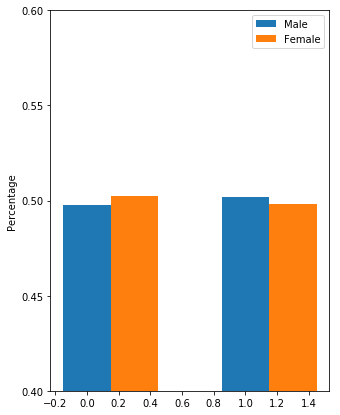

In [54]:
england_male = sum(all_practices_with_demo['Total_Male'])
england_female = sum(all_practices_with_demo['Total_Female'])

england_male_proportion = england_male/(england_female+england_male)
england_female_proportion = england_female/(england_female+england_male)

leeds_male = sum(leeds_practices_with_demo['Total_Male'])
leeds_female = sum(leeds_practices_with_demo['Total_Female'])

leeds_male_proportion = leeds_male/(leeds_female+leeds_male)
leeds_female_proportion = leeds_female/(leeds_female+leeds_male)

axes = plt.gcf()
fig, ax = plt.subplots(figsize=(5,7))
x_ax = np.arange(2)
width = 0.3
b1 = ax.bar(x_ax, [england_male_proportion, leeds_male_proportion], width, label='Male')
b2 = ax.bar(x_ax + width, [england_female_proportion, leeds_female_proportion] , width, label='Female')

plt.ylim(0.4, 0.6)
plt.yticks([0.4, 0.45, 0.5, 0.55, 0.6])
plt.ylabel('Percentage')
plt.legend()

To create histograms of the age distribution for GP practices in Leeds and England, as a whole 

The original bins for the age groups in the demographic data was sepperated by sex. To summarise the age distribution of all people, the values for each sex were added together and new bins were created, without reference to sex. These new bins were systematically created using a for loop to save time and prevent typing errors.

In [55]:
a = 0
age_bins = []
for i in range(20):
    age_bins.append(a)
    a += 5
age_bins

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

By manually creating bins, I have created a histrogram of the age distribution for GP practices in Leeds, using the bar chart function of matplotlib.

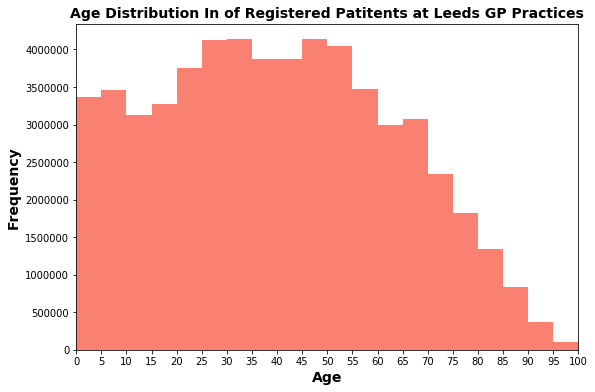

In [56]:
leeds_male_demographics = \
    pd.DataFrame(leeds_practices_with_demo.sum().iloc[19:39])
leeds_female_demographics = \
    pd.DataFrame(leeds_practices_with_demo.sum().iloc[39:])

leeds_male_and_female_ages = \
    np.array(leeds_male_demographics[0]) + \
    np.array(leeds_female_demographics[0])


leeds_age_demographics = pd.DataFrame(leeds_male_and_female_ages, age_bins)

all_male_demographics = \
    pd.DataFrame(all_practices_with_demo.sum().iloc[19:39])
all_female_demographics = \
    pd.DataFrame(all_practices_with_demo.sum().iloc[39:])

all_male_and_female_ages = \
    np.array(all_male_demographics[0]) + \
    np.array(all_female_demographics[0])


all_age_demographics = pd.DataFrame(all_male_and_female_ages, age_bins)

bold_dict = {'size': 14,
             'weight': 'bold'}

plt.bar(list(all_age_demographics.index), all_age_demographics[0], 5,
        align='edge', color='#FA8072')

plt.xlim(0, 100)
plt.xticks(range(0, 101, 5))
plt.title('Age Distribution In of Registered Patitents at Leeds GP Practices',
          fontdict=bold_dict)
plt.xlabel('Age', fontdict=bold_dict)
plt.ylabel('Frequency', fontdict=bold_dict)

plt.gcf().set_size_inches(9, 6)

***

# Assignment C

## 1.

Assuming that one prescription of a statin represents a patient, and that each patient is only prescribed one type of statin, once a month. This however causes some statins to be represented as being dispraportionatley expensive. For example, the liquid suspensions of atorvastatin, are prescribed as large quantities of doses in very few prescriptions.

The demographic data used was recorded for the quarter, ending in January 2016.

In [57]:
england_patients = \
    sum(demo_data['Total_All'])
    
print('In total, there were %d patients in England ' +
      'at the time of Janury 2016.' % england_patients)

In total, there were %d patients in England at the time of Janury 2016.


In [58]:
# List of statin drugs to search prescribing data for.
statin_drugs = ['simvastatin', 'atorvastatin',
                'rosuvastatin', 'pravastatin',
                'fluvastatin']

# Subset dataframe to only statins
statin_prescriptions = \
    prescribing_data_all.loc[prescribing_data_all['bnf name']
                             .str.contains('|'.join(statin_drugs), case=False)]

# Group statin prescription dataframe by drug name.
statin_prescriptions = \
    statin_prescriptions.groupby('bnf name').sum()

statin_prescriptions.head()

,items,act cost,quantity
bnf name,,,
Atorvastatin_Liq Spec 10mg/5ml,15,6168.40,3850
Atorvastatin_Liq Spec 40mg/5ml,6,1390.06,300
Atorvastatin_Oral Soln 20mg/5ml,10,1303.97,1885
Atorvastatin_Oral Susp 20mg/5ml,73,9416.01,15250
Atorvastatin_Tab 10mg,558739,758964.78,18999392


**Statin Prescriptions:**

In [59]:
# Calculating the relative cost per prescription
statin_prescriptions['relative_cost_per_prescription'] = \
    statin_prescriptions['act cost']/statin_prescriptions['items']

# Calculating the relative cost per patient
statin_prescriptions['relative_cost_per_patient'] = \
    statin_prescriptions['act cost']/england_patients

# Renaming columns for presentation
statin_prescriptions.columns = ['Number of Prescriptions',
                                'Total Spend on Drug (£)',
                                'Total Units of Drug Prescribed',
                                'Relative Cost of Drug per Prescription (£)',
                                'Relative Cost of Drug per Patient (£)']

# Round the columns containing monetery values to 2 decimal places
money_columns = ['Total Spend on Drug (£)',
                 'Relative Cost of Drug per Prescription (£)',
                 'Relative Cost of Drug per Patient (£)']

for i in money_columns:
    statin_prescriptions[i] = statin_prescriptions[i]\
                              .apply(lambda x: np.round(x, decimals=2))

statin_prescriptions

,Number of Prescriptions,Total Spend on Drug (£),Total Units of Drug Prescribed,Relative Cost of Drug per Prescription (£),Relative Cost of Drug per Patient (£)
bnf name,,,,,
Atorvastatin_Liq Spec 10mg/5ml,15,6168.40,3850,411.23,0.00
Atorvastatin_Liq Spec 40mg/5ml,6,1390.06,300,231.68,0.00
Atorvastatin_Oral Soln 20mg/5ml,10,1303.97,1885,130.40,0.00
Atorvastatin_Oral Susp 20mg/5ml,73,9416.01,15250,128.99,0.00
Atorvastatin_Tab 10mg,558739,758964.78,18999392,1.36,0.01
Atorvastatin_Tab 20mg,974595,1578708.30,33150186,1.62,0.03
Atorvastatin_Tab 30mg,942,27104.41,33470,28.77,0.00
Atorvastatin_Tab 40mg,800050,1390467.64,25460699,1.74,0.02
Atorvastatin_Tab 60mg,1570,45314.84,48954,28.86,0.00


In [60]:
print('For GP practices in England, during the month of December 2015:\n\n')

print('The total number of statin prescriptions was: %d \n'
      % statin_prescriptions['Number of Prescriptions'].sum())

print('The total spend on statin prescriptions was: £%d \n'
      % statin_prescriptions['Total Spend on Drug (£)'].sum())

print('The mean cost per prescription of a statin was: £%.2f'
      % np.mean(statin_prescriptions['Relative Cost of Drug per Prescription (£)']))
print('The median cost per prescription of a statin was: £%.2f \n'
      % np.median(statin_prescriptions['Relative Cost of Drug per Prescription (£)']))

print('The total cost of statins per patient in England was: £%.2f \n'
      % statin_prescriptions['Relative Cost of Drug per Patient (£)'].sum())

statins_percent = \
    (statin_prescriptions['Total Spend on Drug (£)'].sum()\
     /prescribing_data_all['act cost'].sum())*100
statins_percent = np.round(statins_percent, decimals=3)
    
    
print('Statins made up %' + str(statins_percent) + ' of all prescription costs')

For GP practices in England, during the month of December 2015:


The total number of statin prescriptions was: 5972071 

The total spend on statin prescriptions was: £12765855 

The mean cost per prescription of a statin was: £76.33
The median cost per prescription of a statin was: £24.61 

The total cost of statins per patient in England was: £0.20 

Statins made up %1.674 of all prescription costs


## 2.

The deprivation dataset was read into a pandas dataframe, named `imd`. Only the relevant columns of the dataset were imported. These included:
* *'Postcode'* - Set as the index column, for the purpose of merging with GP prescribing data from Leeds and England as a whole.
* *'Index of Multiple Deprivation Rank'* and *'Index of Multiple Deprivation Decile'* - for analysis of their relationship to statin prescriptions.

In [61]:
# Reading the IMD dataset as pandas dataframe imd
url = \
    'https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv'

imd = pd.read_csv(url, usecols=['Postcode',
                                'Index of Multiple Deprivation Rank',
                                'Index of Multiple Deprivation Decile'],
                  index_col='Postcode')
imd.head()

,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile
Postcode,,
TS18 1HU,73.0,1.0
TS18 2AW,551.0,1.0
TS26 8DB,967.0,1.0
TS1 3BE,1914.0,1.0
TS14 7DJ,7082.0,3.0


The `leeds_practices_cost_per_patient` dataframe (with *practice code* replaced by *post code* as index) was merged with the `imd` dataframe. 

Once merged, the index of the new `leeds_imd` dataframe was reset and replaced with practices codes.

In [62]:
leeds_imd = pd.merge(left = leeds_practices_cost_per_patient.reset_index().set_index('post_code'),
                    right = imd,
                    left_index = True,
                    right_index = True)
leeds_imd.reset_index(inplace=True)
leeds_imd.set_index('index', inplace=True)
leeds_imd.head(3)

,level_0,practice_name,city,items,act cost,quantity,Total_All,cost_per_patient,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile
index,,,,,,,,,,
Y02002,LS1 8TL,ONE MEDICARE LLP-THE LIGHT,THE LIGHT THE HEADROW,8474,77881.34,811668,13052,5.967004,8358.0,3.0
Y02002,LS1 8TL,ONE MEDICARE LLP-THE LIGHT,THE LIGHT THE HEADROW,8474,77881.34,811668,13052,5.967004,8358.0,3.0
B86096,LS10 2JJ,ARTHINGTON MEDICAL CENTRE,LEEDS,10158,94884.12,915164,5822,16.297513,762.0,1.0


To improve the presentation of the data, column headers and the index header were renamed. The columns were then rearranged using integer based positioning (`.iloc`) and `numpy.r_`, for concatenation of slices of these positions.

In [63]:
# Renaming columns of leeds_imd dataframe
leeds_imd.columns = ['post code',
                     'practice name',
                     'city',
                     'prescriptions made',
                     'total cost of prescriptions',
                     'units of drug prescribed',
                     'total number of patients',
                     'cost per patient',
                     'index of multiple deprivation rank',
                     'index of multiple deprivation decile']

# Renaming index header.
leeds_imd.index.name = 'practice code'

leeds_imd.head(3)

,post code,practice name,city,prescriptions made,total cost of prescriptions,units of drug prescribed,total number of patients,cost per patient,index of multiple deprivation rank,index of multiple deprivation decile
practice code,,,,,,,,,,
Y02002,LS1 8TL,ONE MEDICARE LLP-THE LIGHT,THE LIGHT THE HEADROW,8474,77881.34,811668,13052,5.967004,8358.0,3.0
Y02002,LS1 8TL,ONE MEDICARE LLP-THE LIGHT,THE LIGHT THE HEADROW,8474,77881.34,811668,13052,5.967004,8358.0,3.0
B86096,LS10 2JJ,ARTHINGTON MEDICAL CENTRE,LEEDS,10158,94884.12,915164,5822,16.297513,762.0,1.0


In [64]:
# Assigning the leeds_imd dataframe to a concatenation of slices
# of itself, in order to re-order the columns for presentation.
leeds_imd = leeds_imd.iloc[:, np.r_[1 , 2 , 0 , 8:10 , 3:8 ]]
leeds_imd.head()

,practice name,city,post code,index of multiple deprivation rank,index of multiple deprivation decile,prescriptions made,total cost of prescriptions,units of drug prescribed,total number of patients,cost per patient
practice code,,,,,,,,,,
Y02002,ONE MEDICARE LLP-THE LIGHT,THE LIGHT THE HEADROW,LS1 8TL,8358.0,3.0,8474,77881.34,811668,13052,5.967004
Y02002,ONE MEDICARE LLP-THE LIGHT,THE LIGHT THE HEADROW,LS1 8TL,8358.0,3.0,8474,77881.34,811668,13052,5.967004
B86096,ARTHINGTON MEDICAL CENTRE,LEEDS,LS10 2JJ,762.0,1.0,10158,94884.12,915164,5822,16.297513
B86642,DR SA ALI'S PRACTICE,HUNSLET,LS10 2PE,2126.0,1.0,4263,22621.29,259076,1527,14.814204
B86035,THE WHITFIELD PRACTICE,24 CHURCH STREET,LS10 2PT,2126.0,1.0,17697,130642.43,1352088,7594,17.203375


## 3.

A subset of the national GP prescribing dataframe was created, under the name of `england_statin_prescriptions`, with only the unique prescriptions of statin drugs.

In [65]:
# Creating a subset of national prescribing data for statin drugs.
england_statin_prescriptions = \
    prescribing_data_all.loc[prescribing_data_all['bnf name']
                             .str.contains('|'.join(statin_drugs), case=False)]

england_statin_prescriptions.head()

,practice,bnf name,items,act cost,quantity
102,Y00327,Atorvastatin_Tab 40mg,2,1.67,29
103,Y00327,Simvastatin_Tab 20mg,1,0.20,3
647,N85638,Atorvastatin_Tab 20mg,1,0.76,14
648,N85638,Atorvastatin_Tab 40mg,1,0.17,1
650,N85638,Pravastatin Sod_Tab 10mg,1,0.38,7


Grouping by (`df.groupby()`) *practice* and the use of the *.sum()* method creates a new dataframe that summarises the numerical data for statin prescriptions in each English GP practice for the month of December 2015.

In [66]:
# Grouping nationwide statin prescriptions by practice.
england_statin_prescriptions = \
    england_statin_prescriptions.groupby(by='practice').sum()

england_statin_prescriptions.head()

,items,act cost,quantity
practice,,,
A81001,435,1816.80,18792
A81002,2460,6513.51,98340
A81003,605,868.39,17464
A81004,919,2134.60,36302
A81005,1264,1887.11,35575


In [67]:
# Merging statin prescription data with demographic data.
england_statin_prescriptions = \
    pd.merge(left=england_statin_prescriptions,
             right=demo_data.iloc[:, np.r_[0, 3, 7]],
             left_index=True,
             right_index=True)

england_statin_prescriptions.head()

,items,act cost,quantity,POSTCODE,ONS_REGION_CODE,Total_All
A81001,435,1816.80,18792,TS18 1HU,E39000027,4234
A81002,2460,6513.51,98340,TS18 2AW,E39000027,19691
A81003,605,868.39,17464,TS26 8DB,E39000027,3357
A81004,919,2134.60,36302,TS1 3BE,E39000027,9151
A81005,1264,1887.11,35575,TS14 7DJ,E39000027,7883


In [68]:
# Merging statin prescription by practice with relevant information
# on practices
england_statin_prescriptions = \
    pd.merge(left=england_statin_prescriptions,
             right=practice_data_all.set_index('practice_code')
                                    .iloc[:, np.r_[0:5]],
             left_index=True,
             right_index=True)

england_statin_prescriptions.head()

,items,act cost,quantity,POSTCODE,ONS_REGION_CODE,Total_All,practice_name,building_name,street,city,region
A81002,2460,6513.51,98340,TS18 2AW,E39000027,19691,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND
A81003,605,868.39,17464,TS26 8DB,E39000027,3357,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND
A81004,919,2134.60,36302,TS1 3BE,E39000027,9151,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND
A81005,1264,1887.11,35575,TS14 7DJ,E39000027,7883,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,
A81006,1958,4074.99,61603,TS18 2AT,E39000027,12345,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND


In [69]:
# Setting postcode as index for merginf with IMD data.
england_statin_prescriptions.reset_index(inplace=True)
england_statin_prescriptions.set_index('POSTCODE', inplace=True)

# Strip trailing whitespace from imd index(postcodes)
imd.index = imd.index.str.strip()

# Merging statin prescription data + GP info with IMD data.
england_statin_prescriptions = \
    pd.merge(left=england_statin_prescriptions,
             right=imd,
             left_index=True,
             right_index=True)

england_statin_prescriptions.head()

,index,items,act cost,quantity,ONS_REGION_CODE,Total_All,practice_name,building_name,street,city,region,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile
AL1 3HD,E82060,948,2070.01,39189,E39000030,19971,PARKBURY HOUSE SURGERY,PARKBURY HOUSE,ST.PETERS STREET,ST.ALBANS,HERTFORDSHIRE,27499.0,9.0
AL1 3JB,E82031,982,1677.30,33049,E39000030,18353,MALTINGS SURGERY,THE MALTINGS SURGERY,8-14 VICTORIA STREET,ST ALBANS,HERTFORDSHIRE,15566.0,5.0
AL1 4JE,E82004,357,472.57,11977,E39000030,3844,HATFIELD ROAD SURGERY,61 HATFIELD ROAD,,ST.ALBANS,HERTFORDSHIRE,27499.0,9.0
AL10 0BS,E82002,961,1838.21,31554,E39000030,9476,WRAFTON HOUSE SURGERY,WRAFTON HOUSE SURGERY,9/11 WELLFIELD ROAD,HATFIELD,HERTFORDSHIRE,16755.0,6.0
AL10 0NL,E82018,1464,2563.79,47677,E39000030,12512,LISTER HOUSE SURGERY,LISTER HOUSE,THE COMMON,HATFIELD,HERTFORDSHIRE,8669.0,3.0


In [70]:
# Remove duplicate rows
england_statin_prescriptions.drop_duplicates(inplace=True)

# Set index back to practice codes
england_statin_prescriptions.reset_index(inplace=True)
england_statin_prescriptions.set_index('index', inplace=True)

# Re-ordering columns and renaming headers for better presentation.
england_statin_prescriptions = \
    england_statin_prescriptions.iloc[ : , np.r_[6:11 , 0, 2, 1, 5, 4, 11, 12]]

england_statin_prescriptions.columns = ['practice name' , 
                                       'building name' , 
                                       'street' , 
                                       'city' , 
                                       'region' , 
                                       'post code' , 
                                       'total statin spend (£)' , 
                                       'total statin prescriptions' ,
                                        'total patients registered' ,
                                       'ons region code' , 
                                       'index of multiple deprivation rank' , 
                                       'index of multiple deprivation decile']

england_statin_prescriptions.head()

,practice name,building name,street,city,region,post code,total statin spend (£),total statin prescriptions,total patients registered,ons region code,index of multiple deprivation rank,index of multiple deprivation decile
index,,,,,,,,,,,,
E82060,PARKBURY HOUSE SURGERY,PARKBURY HOUSE,ST.PETERS STREET,ST.ALBANS,HERTFORDSHIRE,AL1 3HD,2070.01,948,19971,E39000030,27499.0,9.0
E82031,MALTINGS SURGERY,THE MALTINGS SURGERY,8-14 VICTORIA STREET,ST ALBANS,HERTFORDSHIRE,AL1 3JB,1677.30,982,18353,E39000030,15566.0,5.0
E82004,HATFIELD ROAD SURGERY,61 HATFIELD ROAD,,ST.ALBANS,HERTFORDSHIRE,AL1 4JE,472.57,357,3844,E39000030,27499.0,9.0
E82002,WRAFTON HOUSE SURGERY,WRAFTON HOUSE SURGERY,9/11 WELLFIELD ROAD,HATFIELD,HERTFORDSHIRE,AL10 0BS,1838.21,961,9476,E39000030,16755.0,6.0
E82018,LISTER HOUSE SURGERY,LISTER HOUSE,THE COMMON,HATFIELD,HERTFORDSHIRE,AL10 0NL,2563.79,1464,12512,E39000030,8669.0,3.0


Two practices do not have any data corresponding to IMD. These have been removed, as they cannot be used to investigate a link between index of multiple deprivation and statin prescriptions. Furthermore, removing NaN values will allow for the conversion of these two series to integer datatypes, as NaN can only be a float value.

In [71]:
england_statin_prescriptions.loc[~(england_statin_prescriptions['index of multiple deprivation rank'] > 0)]

,practice name,building name,street,city,region,post code,total statin spend (£),total statin prescriptions,total patients registered,ons region code,index of multiple deprivation rank,index of multiple deprivation decile
index,,,,,,,,,,,,
M82620,THE MEADOWS MEDICAL PRACTICE,ERW VANE SURGERY,PENYBONT ROAD,KNIGHTON,POWYS,LD7 1HB,752.50,327,3787,E39000032,NaN,NaN
G82757,LAKE MEDICAL CENTRE,53 TODD CRESCENT,KEMSLEY,SITTINGBOURNE,KENT,ME12 2TZ,424.69,177,2134,E39000035,NaN,NaN


In [72]:
# Removing all rows with IMD rank below 0
england_statin_prescriptions = \
    england_statin_prescriptions\
    .loc[england_statin_prescriptions
         ['index of multiple deprivation rank'] > 0]

# Changing data type of IMD rank and decile from float to integer.
england_statin_prescriptions.iloc[:, [10, 11]] = \
    england_statin_prescriptions.iloc[:, [10, 11]].astype(int)

# Create a statin spend per person
england_statin_prescriptions['relative statin spend'] = \
    england_statin_prescriptions['total statin spend (£)']\
    / england_statin_prescriptions['total patients registered']

england_statin_prescriptions.head()

,practice name,building name,street,city,region,post code,total statin spend (£),total statin prescriptions,total patients registered,ons region code,index of multiple deprivation rank,index of multiple deprivation decile,relative statin spend
index,,,,,,,,,,,,,
E82060,PARKBURY HOUSE SURGERY,PARKBURY HOUSE,ST.PETERS STREET,ST.ALBANS,HERTFORDSHIRE,AL1 3HD,2070.01,948,19971,E39000030,27499,9,0.103651
E82031,MALTINGS SURGERY,THE MALTINGS SURGERY,8-14 VICTORIA STREET,ST ALBANS,HERTFORDSHIRE,AL1 3JB,1677.30,982,18353,E39000030,15566,5,0.091391
E82004,HATFIELD ROAD SURGERY,61 HATFIELD ROAD,,ST.ALBANS,HERTFORDSHIRE,AL1 4JE,472.57,357,3844,E39000030,27499,9,0.122937
E82002,WRAFTON HOUSE SURGERY,WRAFTON HOUSE SURGERY,9/11 WELLFIELD ROAD,HATFIELD,HERTFORDSHIRE,AL10 0BS,1838.21,961,9476,E39000030,16755,6,0.193986
E82018,LISTER HOUSE SURGERY,LISTER HOUSE,THE COMMON,HATFIELD,HERTFORDSHIRE,AL10 0NL,2563.79,1464,12512,E39000030,8669,3,0.204906


In [73]:
#lowest relative spenders of statins from the first decile
lowest_decile = \
    england_statin_prescriptions\
    .loc[england_statin_prescriptions['index of multiple deprivation decile'] == 1]

lowest_decile.sort_values('relative statin spend', ascending = True)

,practice name,building name,street,city,region,post code,total statin spend (£),total statin prescriptions,total patients registered,ons region code,index of multiple deprivation rank,index of multiple deprivation decile,relative statin spend
index,,,,,,,,,,,,,
N81607,WESTMINSTER SURGERY,16-18 CHURCH PARADE,,ELLESMERE PORT,CHESHIRE,CH65 2ER,2.85,5,2676,E39000026,1869,1,0.001065
Y02988,THE KINGSTANDING COMMUNITY PRACTICE,WARREN FARM HEALTH CENTRE,WARREN FARM ROAD,BIRMINGHAM,WEST MIDLANDS,B44 0PU,1.06,1,325,E39000033,980,1,0.003262
N82647,THE SURGERY,TOWNSEND N'HOOD H/C,98 TOWNSEND LANE,LIVERPOOL,,L6 0BB,7.96,6,1883,E39000026,165,1,0.004227
B81057,ST ANDREWS NEWINGTON,NEWINGTON HEALTHCARE CTR,2 PLANE STREET,KINGSTON UPON HULL,,HU3 6BX,15.27,9,2573,E39000029,526,1,0.005935
Y02999,JARROW GP PRACTICE,JARROW GP PRACTICE,PALMER COMMUNITY HOSP,JARROW,TYNE & WEAR,NE32 3UX,5.34,4,837,E39000027,2153,1,0.006380
A81633,HAVEN MEDICAL PRACTICE,HAVEN MEDICAL PRACTICE,7 HARRIS STREET,MIDDLESBROUGH,,TS1 5EF,11.69,9,917,E39000027,81,1,0.012748
A81634,THE ARRIVAL PRACTICE,THE ARRIVAL PRACTICE,ENDURANCE HSE CLARENCE ST,STOCKTON ON TEES,,TS18 2EP,32.48,26,1533,E39000027,1428,1,0.021187
Y01057,THE HEALTH XCHANGE,THE HEALTH XCHANGE,WILLIAM BOOTH CENTRE,WILLIAM BOOTH LANE,BIRMINGHAM,B4 6HA,19.34,14,912,E39000033,1174,1,0.021206
A81630,FULCRUM MEDICAL PRACTICE,FULCRUM MEDICAL PRACTICE,ACKLAM ROAD ACKLAM,MIDDLESBROUGH,,TS5 4EQ,15.45,16,712,E39000027,3207,1,0.021699


In [74]:
#highest relative spenders of statins from the last decile

highest_decile = \
    england_statin_prescriptions\
    .loc[england_statin_prescriptions['index of multiple deprivation decile'] == 10]

highest_decile.sort_values('relative statin spend', ascending = False)

,practice name,building name,street,city,region,post code,total statin spend (£),total statin prescriptions,total patients registered,ons region code,index of multiple deprivation rank,index of multiple deprivation decile,relative statin spend
index,,,,,,,,,,,,,
B86010,COLLINGHAM CHURCH VIEW SURGERY,CHURCH VIEW SURGERY,SCHOOL LANE COLLINGHAM,WETHERBY,WEST YORKSHIRE,LS22 5BQ,6332.22,1475,9198,E39000029,32639,10,0.688434
G82793,ALLINGTON PARK,ALLINGTON PARK SURGERY,1C NEWBURY AVENUE,ALLINGTON,MAIDSTONE KENT,ME16 0RB,1697.74,581,2720,E39000035,30506,10,0.624169
G82226,WIGMORE MEDICAL CENTRE,114 WOODSIDE ROAD,WIGMORE,GILLINGHAM,KENT,ME8 0PW,2456.40,544,4640,E39000035,31759,10,0.529397
C86609,AUCKLEY SURGERY,41 ELLERS LANE,AUCKLEY,DONCASTER,,DN9 3HY,1530.79,579,3083,E39000029,30230,10,0.496526
J82027,LIPHOOK VILLAGE SURGERY,LIPHOOK VILLAGE SURGERY,THE SQUARE,LIPHOOK,HAMPSHIRE,GU30 7AQ,2743.73,754,5550,E39000025,30281,10,0.494366
C83031,NETTLEHAM MEDICAL PRACTICE,NETTLEHAM MEDICAL PRACT.,14 LODGE LANE,NETTLEHAM,LINCOLNSHIRE,LN2 2RS,5582.47,2411,11398,E39000030,32189,10,0.489776
L83045,BOVEY TRACEY & CHUDLEIGH PRACTICE,RIVERSIDE SURGERY,LE MOLAY LITTRY WAY,BOVEY TRACEY,DEVON,TQ13 9QP,6992.44,1549,14411,E39000036,31235,10,0.485215
B85026,KIRKBURTON HEALTH CENTRE,KIRKBURTON HEALTH CENTRE,5A SHELLEY LNE KIRBURTON,HUDDERSFIELD,WEST YORKSHIRE,HD8 0SJ,3871.50,731,8072,E39000029,30887,10,0.479621
H82087,BARN SURGERY,THE BARN SURGERY,22 FERRING ST FERRING,WORTHING,WEST SUSSEX,BN12 5HJ,1918.16,500,4080,E39000035,30381,10,0.470137


In [75]:
# Calculating the mean values for relative statin cost for the
# lowest and highest deciles of IMD
lowest_mean = np.mean(lowest_decile['relative statin spend'])
highest_mean = np.mean(highest_decile['relative statin spend'])

# Calculating the median values for relative statin cost for the
# lowest and highest deciles of IMD
lowest_median = np.median(lowest_decile['relative statin spend'])
highest_median = np.median(highest_decile['relative statin spend'])

print('The mean relative spend on statins, through prescriptions ' +
      'given by GPs:\n\n' +
      'In the first decile of the index of multiple ' +
      'deprivation was: £%.2f \n' % lowest_mean +
      'In the tenth decile of the index of multiple ' +
      'deprivation was: £%.2f \n\n' % highest_mean)

print('The median relative spend on statins, through prescriptions ' +
      'given by GPs:\n\n' +
      'In the first decile of the index of multiple ' +
      'deprivation was: £%.2f \n' % lowest_median +
      'In the tenth decile of the index of multiple ' +
      'deprivation was: £%.2f ' % highest_median)

The mean relative spend on statins, through prescriptions given by GPs:

In the first decile of the index of multiple deprivation was: £1.03 
In the tenth decile of the index of multiple deprivation was: £0.22 


The median relative spend on statins, through prescriptions given by GPs:

In the first decile of the index of multiple deprivation was: £0.22 
In the tenth decile of the index of multiple deprivation was: £0.21 


The difference between the mean values was far greater than that of the median values, suggesting and outlier in the first decile.

This outlier is GP practice E87723, NEW ELGIN PRACTICE in West London. This practice is reocreded as only having a single patient but having made 352 prescriptions for statins.

Using its label based location reveals that this practice was recorded has having a single patient. However, searching the prescribing data for this practice reveals that there were 1104 prescriptions made in Dec 2015. Due to this, it is likely that this outlier is caused by an error in the demographic data. 

As this only affects one practice out of over 7000 ( < 0.02% of the data) I will drop it from the `england_statin_prescriptions` dataframe.

In [76]:
# Returns dataframe of practices with a large (over £1) relative
# cost of statin prescriptions.
england_statin_prescriptions.loc[england_statin_prescriptions
                                 ['relative statin spend'] > 1]

,practice name,building name,street,city,region,post code,total statin spend (£),total statin prescriptions,total patients registered,ons region code,index of multiple deprivation rank,index of multiple deprivation decile,relative statin spend
index,,,,,,,,,,,,,
Y04786,HEALTH 1000 LTD,KING GEORGE HOSPITAL,BARLEY LANE,ILFORD,LONDON,IG3 8YB,620.32,531,316,E39000018,12837,4,1.963038
K84066,LUTHER STREET MEDICAL PRACTICE,LUTHER STREET MEDICAL CTR,PO BOX 7 ST ALDATES,OXFORD,,OX1 1TD,459.08,24,388,E39000034,6844,3,1.183196
E87711,ROYAL HOSPITAL CHELSEA,ROYAL HOSPITAL CHELSEA,ROYAL HOSPITAL ROAD,,LONDON,SW3 4SR,294.92,229,284,E39000018,18319,6,1.038451
G82651,BURRSWOOD NURSING HOME,BURRSWOOD NURSING HOME,GROOMBRIDGE,TUNBRIDGE WELLS,KENT,TN3 9PY,2.06,2,1,E39000035,26873,9,2.060000
H84608,SAYER (RICHMOND GREEN),RICHMOND GREEN MED.CTR.,19 THE GREEN,RICHMOND,SURREY,TW9 1PX,4669.32,203,2026,E39000018,24045,8,2.304699
E87723,NEW ELGIN PRACTICE,THE NEW ELGIN PRACTICE,44 CHIPPENHAM ROAD,LONDON,,W9 2AF,995.74,352,1,E39000018,2579,1,995.740000


In [77]:
# Returns registered patient data for the anomalous practice 'E87723'.
demo_data.loc['E87723', ['Total_Male', 'Total_Female', 'Total_All']]

Total_Male      0
Total_Female    1
Total_All       1
Name: E87723, dtype: object

In [78]:
# Returns shape precribing data for preactice E87723
prescribing_data_all.loc[prescribing_data_all['practice']
                         .str.contains('E87723')].shape

(1104, 5)

In [79]:
# Removing practice E87723 from the statin prescription data.
england_statin_prescriptions.drop('E87723', axis=0, inplace=True)

In [80]:
lowest_decile = \
    england_statin_prescriptions\
    .loc[england_statin_prescriptions
         ['index of multiple deprivation decile'] == 1]

lowest_mean = np.mean(lowest_decile['relative statin spend'])
lowest_median = np.median(lowest_decile['relative statin spend'])

print('The new mean relative spend on statins ' +
      'in the first decile is: £%.2f \n'
      % lowest_mean +
      'The new median relative spend on statins ' +
      'in the first decile is: £%.2f \n'
      % lowest_median)

The new mean relative spend on statins in the first decile is: £0.23 
The new median relative spend on statins in the first decile is: £0.22 



There is little difference to the distribution of spending on statin prescriptions between the 10 deciles of IMD, as illustrated by the box plot below.

In [81]:
# Empty list to loop through
imd_deciles = []

# Creates a list of numpy arrays, with each array containing the
# values for relative statin prescription spending for each decile.
for i in range(1,11):
    imd_deciles.append(np.array(england_statin_prescriptions
                       .loc[england_statin_prescriptions
                            ['index of multiple deprivation decile'] == i]
                            ['relative statin spend']))

In [82]:
u = []
for i in range(1,11):
    u.append('Decile ' + str(i))
u

['Decile 1',
 'Decile 2',
 'Decile 3',
 'Decile 4',
 'Decile 5',
 'Decile 6',
 'Decile 7',
 'Decile 8',
 'Decile 9',
 'Decile 10']

Text(0.5,0,'Decile')

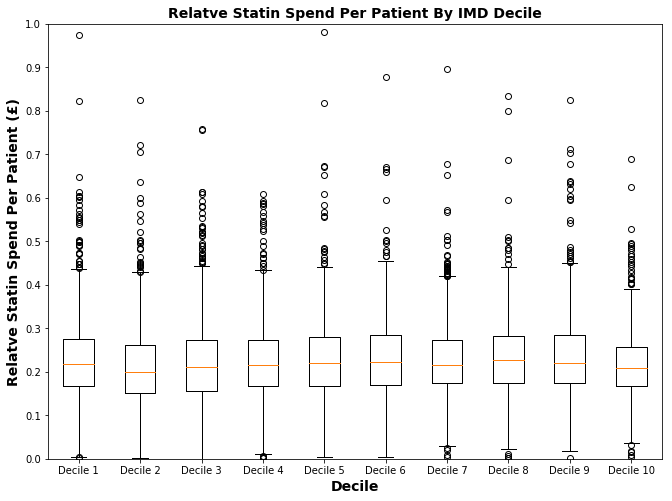

In [83]:
bold_dict = {'size': 14,
             'weight': 'bold'}

plt.boxplot(imd_deciles,
            labels=['Decile 1', 'Decile 2',
                    'Decile 3', 'Decile 4',
                    'Decile 5', 'Decile 6',
                    'Decile 7', 'Decile 8',
                    'Decile 9', 'Decile 10'])

plt.ylim(0,1)
axes = plt.gcf()
axes.set_size_inches(11,8)

plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
            0.6, 0.7, 0.8, 0.9, 1.0])
plt.title('Relatve Statin Spend Per Patient By IMD Decile', fontdict=bold_dict)
plt.ylabel('Relatve Statin Spend Per Patient (£)', fontdict=bold_dict)
plt.xlabel('Decile', fontdict=bold_dict)

Practices that are in the lowest decile of **relative costs of statin prescriptions** tend to be of a lower IMD rank, as illustrated in the boxplot below.

Text(0.5,1,'IMD Ranks of The Practices That Have the Highest and\nLowest Relative Cost Of Statin Prescriptions')

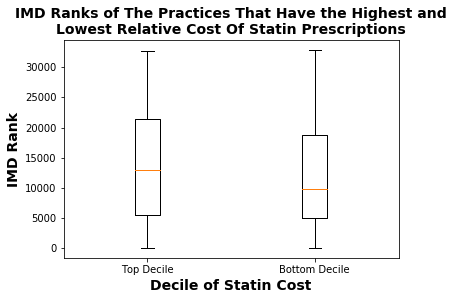

In [84]:
england_statin_prescriptions.sort_values('relative statin spend',
                                         ascending=True, inplace=True)

x = int(len(england_statin_prescriptions)/10)

top_10_percent_statins = \
    np.array(england_statin_prescriptions
             ['index of multiple deprivation rank'].tail(x))

bottom_10_percent_statins = \
    np.array(england_statin_prescriptions
             ['index of multiple deprivation rank'].head(x))

plt.boxplot([top_10_percent_statins,
            bottom_10_percent_statins],
            labels=['Top Decile', 'Bottom Decile'])

plt.ylabel('IMD Rank', fontdict=bold_dict)
plt.xlabel('Decile of Statin Cost', fontdict=bold_dict)
plt.title('IMD Ranks of The Practices That Have the Highest and\n' +
          'Lowest Relative Cost Of Statin Prescriptions', fontdict=bold_dict)

In [85]:
np.mean(bottom_10_percent_statins)

12252.413838120105

In [86]:
np.mean(top_10_percent_statins)

13824.372062663186

Combining the lowest and highest spenders of the practices in the catchment area of the least and most deprived areas respectively, gives the `both_spend_groups` dataframe.

In [87]:
both_spend_groups = \
    pd.concat([lowest_decile.sort_values('relative statin spend', ascending=True).head(100), 
               highest_decile.sort_values('relative statin spend', ascending=False).head(100)],
               axis=0)

## 4.

Importing the *75 mortality rate for cardiovascular diseases* dataset as `cvd75`.

In [88]:
cvd75 = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv')

In [89]:
cvd75.head()

,Year,Period of coverage,Breakdown,Level,Level description,Gender,Age,Indicator value,Lower CI,Upper CI,Numerator,Denominator
0,2016,1/1/2016 to 31/12/2016,England,England,England,Person,All,72.7,71.9,73.5,"33,816","50,798,600"
1,2015,1/1/2015 to 31/12/2015,England,England,England,Person,All,74,73.3,74.8,"33,664","50,360,500"
2,2014,1/1/2014 to 31/12/2014,England,England,England,Person,All,73.8,73,74.6,"32,895","49,941,800"
3,2013,1/1/2013 to 31/12/2013,England,England,England,Person,All,76.6,75.7,77.4,"33,408","49,584,200"
4,2012,1/1/2012 to 31/12/2012,England,England,England,Person,All,77.7,76.8,78.5,"33,258","49,281,700"


In order to extract regional data, a `df.column_head.unique()` query was utilised to find which column contained region names and what exactly the names were, in order to create a subset dataframe.

To conduct a query of unique values, all column names changed to not have space. A function to replace spaces with underscores may have been more practical with more column headers. However, as there were relatively few, manually renaming was faster.

In [90]:
cvd75.columns = ['year', 'period', 'breakdown', 'level',
                 'level_description', 'gender', 'age', 'indicator_value',
                 'lower_ci', 'upper_ci', 'numerator', 'denominator']

In [91]:
cvd75.level_description.unique()

array(['England', 'East Midlands', 'East of England', 'London',
       'North East', 'North West', 'South East', 'South West',
       'West Midlands', 'Yorkshire and The Humber', '1 - Most deprived',
       '2', '3', '4', '5', '6', '7', '8', '9', '10 - Least deprived'], dtype=object)

From the unique values in the level description column, the exact phrases reffering to the nine English regions were copied into a list. This list was used to create a new dataframe (`cvd75_regions`), containing only rows that made reference to each region **and** the year 2015 **and** all genders ('Person')

In [92]:
nine_english_regions = ['East Midlands', 'East of England', 'London',
                        'North East', 'North West', 'South East', 'South West',
                        'West Midlands', 'Yorkshire and The Humber']

In [93]:
cvd75_regions_2015 = cvd75.loc[cvd75['level_description'].str.contains
                               ('|'.join(nine_english_regions)) &
                               (cvd75['year'] == 2015) & 
                               (cvd75['gender'] == 'Person')]

cvd75_regions_2015

,year,period,breakdown,level,level_description,gender,age,indicator_value,lower_ci,upper_ci,numerator,denominator
471,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500"
472,2015,1/1/2015 to 31/12/2015,Region,E12000006,East of England,Person,All,66.3,64.1,68.5,"3,505","5,541,600"
473,2015,1/1/2015 to 31/12/2015,Region,E12000007,London,Person,All,76.7,74.3,79.1,"4,037","8,208,700"
474,2015,1/1/2015 to 31/12/2015,Region,E12000001,North East,Person,All,86,82.3,89.9,"2,000","2,399,000"
475,2015,1/1/2015 to 31/12/2015,Region,E12000002,North West,Person,All,88.3,86,90.7,"5,413","6,590,500"
476,2015,1/1/2015 to 31/12/2015,Region,E12000008,South East,Person,All,60.8,59,62.5,"4,669","8,171,900"
477,2015,1/1/2015 to 31/12/2015,Region,E12000009,South West,Person,All,64.5,62.3,66.7,"3,316","4,934,700"
478,2015,1/1/2015 to 31/12/2015,Region,E12000005,West Midlands,Person,All,77.9,75.4,80.4,"3,780","5,274,400"
479,2015,1/1/2015 to 31/12/2015,Region,E12000003,Yorkshire and The Humber,Person,All,82.8,80.2,85.5,"3,773","4,950,200"


The *ONS Postcode Lookup* dataset can be used to link GP practices to thier corresponding region, through their postcode. Only the columns at index 2 (postcode) and 16 (region code) were needed, so to save memory, only these two were read into a pandas dataframe.

In [94]:
postcode = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/postcodes.csv',
                       usecols=[2, 16], index_col=0)
postcode.columns = ['region_code']
postcode.head()

,region_code
Postcode 3,
S20 6RU,E12000003
TW4 7BD,E12000007
GU51 3ZQ,E12000008
OX4 6BE,E12000008
TA7 9JH,E12000009


In [95]:
postcode.region_code.unique()

array(['E12000003', 'E12000007', 'E12000008', 'E12000009', 'E12000006',
       'S99999999', 'E12000004', 'E12000002', 'W99999999', 'E12000001',
       'E12000005', 'N99999999', 'L99999999', 'M99999999', nan], dtype=object)

Now that there is a dataframe that links each postcode to its corresponding region code, it can be seen that there are more unique region codes than contained within the CVD75 dataset. The additional region codes do not follow the same naming convention. 

Rows in the `postcode` dataframe that contained a region code, not foiund in the `cvd75_regions_2015` dataframe were filtered out. Rows wiht NaN values were also removed from the `postcode` dataframe.

In [96]:
region_codes = list(cvd75_regions_2015['level'])
region_codes

['E12000004',
 'E12000006',
 'E12000007',
 'E12000001',
 'E12000002',
 'E12000008',
 'E12000009',
 'E12000005',
 'E12000003']

In [97]:
postcode.dropna(axis=0, inplace=True)

postcode = \
    postcode.loc[postcode['region_code'].str.contains('|'.join(region_codes))]

The `postcode` now only contains rows, for which the region code is one of the nine from the `cvd75_regions_2015` dataframe.

In [98]:
postcode.region_code.unique()

array(['E12000003', 'E12000007', 'E12000008', 'E12000009', 'E12000006',
       'E12000004', 'E12000002', 'E12000001', 'E12000005'], dtype=object)

A new column was created with a lambda function that added a cell with the region name corresponding to the region code of that row. A dictionary was used to match the key (region code) to the value (region name).

As dictionaries are mutable, a loop could have been created to add region codes and thier corresponding names to a dictionary. However, at only 9 key-value pairs, doing this manually would have been more time efficient.

In [99]:
english_regions = {'E12000004' : 'East Midlands',
                   'E12000006' : 'East of England',
                   'E12000007' : 'London',
                   'E12000001' : 'North East',
                   'E12000002' : 'North West',
                   'E12000008' : 'South East',
                   'E12000009' : 'South West',
                   'E12000005' : 'West Midlands',
                   'E12000003' : 'Yorkshire and The Humber'}

postcode['region_name'] = postcode['region_code'].apply(lambda x: english_regions[x])

postcode.head()

,region_code,region_name
Postcode 3,,
S20 6RU,E12000003,Yorkshire and The Humber
TW4 7BD,E12000007,London
GU51 3ZQ,E12000008,South East
OX4 6BE,E12000008,South East
TA7 9JH,E12000009,South West


The `postcode` dataframe can now be merged with the `england_statin_prescriptions` dataframe to add information about which of the 9 English regions the GP practices belong to.

In [100]:
x = len(england_statin_prescriptions)

In [101]:
england_statin_prescriptions.reset_index(inplace=True)
england_statin_prescriptions.set_index('post code', inplace=True)

england_statin_prescriptions = pd.merge(left = england_statin_prescriptions,
                                         right = postcode,
                                         left_index=True,
                                         right_index=True)

england_statin_prescriptions.reset_index(inplace=True)
england_statin_prescriptions.set_index('index', inplace=True)

In the process of merging the two dataframes, 31 rows were not carried over. This could be due to the rows not having a postcode corresponding to the `postcode` dataframe.

In [102]:
y = len(england_statin_prescriptions)
x - y

31

In [103]:
england_statin_prescriptions.head(1)

,level_0,practice name,building name,street,city,region,total statin spend (£),total statin prescriptions,total patients registered,ons region code,index of multiple deprivation rank,index of multiple deprivation decile,relative statin spend,region_code,region_name
index,,,,,,,,,,,,,,,
E82060,AL1 3HD,PARKBURY HOUSE SURGERY,PARKBURY HOUSE,ST.PETERS STREET,ST.ALBANS,HERTFORDSHIRE,2070.01,948,19971,E39000030,27499,9,0.103651,E12000006,East of England


In [104]:
england_statin_prescriptions.columns = ['post code', 'practice name',
                                        'building name', 'street', 'city',
                                        'region', 'total statin spend (£)',
                                        'total statin prescriptions',
                                        'total patients registered',
                                        'ons region code',
                                        'index of multiple deprivation rank',
                                        'index of multiple deprivation decile',
                                        'relative statin spend', 'region code',
                                        'region name']

In [105]:
england_statin_prescriptions

,post code,practice name,building name,street,city,region,total statin spend (£),total statin prescriptions,total patients registered,ons region code,index of multiple deprivation rank,index of multiple deprivation decile,relative statin spend,region code,region name
index,,,,,,,,,,,,,,,
E82060,AL1 3HD,PARKBURY HOUSE SURGERY,PARKBURY HOUSE,ST.PETERS STREET,ST.ALBANS,HERTFORDSHIRE,2070.01,948,19971,E39000030,27499,9,0.103651,E12000006,East of England
E82031,AL1 3JB,MALTINGS SURGERY,THE MALTINGS SURGERY,8-14 VICTORIA STREET,ST ALBANS,HERTFORDSHIRE,1677.30,982,18353,E39000030,15566,5,0.091391,E12000006,East of England
E82004,AL1 4JE,HATFIELD ROAD SURGERY,61 HATFIELD ROAD,,ST.ALBANS,HERTFORDSHIRE,472.57,357,3844,E39000030,27499,9,0.122937,E12000006,East of England
E82002,AL10 0BS,WRAFTON HOUSE SURGERY,WRAFTON HOUSE SURGERY,9/11 WELLFIELD ROAD,HATFIELD,HERTFORDSHIRE,1838.21,961,9476,E39000030,16755,6,0.193986,E12000006,East of England
E82018,AL10 0NL,LISTER HOUSE SURGERY,LISTER HOUSE,THE COMMON,HATFIELD,HERTFORDSHIRE,2563.79,1464,12512,E39000030,8669,3,0.204906,E12000006,East of England
E82023,AL10 8HP,BURVILL HOUSE SURGERY,BURVILL HOUSE SURGERY,52/54 DELLFIELD ROAD,HATFIELD,HERTFORDSHIRE,2216.34,1120,9697,E39000030,16663,6,0.228559,E12000006,East of England
E82113,AL2 1ES,COLNEY MEDICAL CENTRE,COLNEY MEDICAL CENTRE,45 KINGS ROAD,LONDON COLNEY,HERTFORDSHIRE,877.72,268,4159,E39000030,25720,8,0.211041,E12000006,East of England
E82055,AL2 3JX,MIDWAY SURGERY,THE MIDWAY SURGERY,93 WATFORD ROAD,ST.ALBANS,HERTFORDSHIRE,3075.33,913,12385,E39000030,30297,10,0.248311,E12000006,East of England
E82107,AL3 5ER,LATTIMORE SURGERY,THE LATTIMORE SURGERY,1 UPTON AVENUE,ST.ALBANS,HERTFORDSHIRE,1673.08,679,8851,E39000030,29447,9,0.189027,E12000006,East of England


## 5.

Grouping the `england_statin_prescriptions` dataframe by region code and calculating the mean of their relative spend on statin prescriptions. This dataframe, containing the mean statin spend per region was merged with the `cvd75` dataframe. Finally, only the columns corresponding to mortality rates and relative cost of statin prescriptions were included in the new `cvd75_and_statins` dataframe.

There is a weak correlation (*r²* = 0.15) between spending on statins and CVD75 mortality rates in England. However, practices in London spend substantially less on statin prescriptions than other regions of comparable mortality rates. Due to this, I beleive that there may a confounder influencing the spend on statins per patient. 

When London is excluded from analysis, the correlation between spending on statins and CVD75 mortality rates in England becomes moderate to strong (*r²* = 0.429).

Furthermore the data points appear to cluster based on geographic proximity. With the exception of London, these clusters include:

* The South (East of England, South East, South West)
* The Midlands (East Midlands, West Midlands)
* The North (North East, North West, Yorkshire and The Humber)

Regions that are higher in lattitude (with the exception of London) appear to have significantly\* higher mortality rates. At a glance there does not appear to be as strong a relationship between lattitude and statin spending alone. Further analysis could use coordiantes, linked with practice codes to assess geographical factors and their relationship to statin spending and mortality.

\* Significance from confidence intervals provided in the CVD75 dataset.

In [106]:
region_statins = \
    england_statin_prescriptions.groupby('region name').mean()
    
cvd75_and_statins = \
    pd.merge(left = cvd75_regions_2015.set_index('level_description'),
             right = region_statins,
             left_index = True,
             right_index = True)

cvd75_and_statins = \
    cvd75_and_statins.iloc[: , [6, 7, 8, 16]]
    
cvd75_and_statins

,indicator_value,lower_ci,upper_ci,relative statin spend
level_description,,,,
East Midlands,76.7,74,79.4,0.220729
East of England,66.3,64.1,68.5,0.212975
London,76.7,74.3,79.1,0.178829
North East,86,82.3,89.9,0.261837
North West,88.3,86,90.7,0.251270
South East,60.8,59,62.5,0.229732
South West,64.5,62.3,66.7,0.242525
West Midlands,77.9,75.4,80.4,0.233988
Yorkshire and The Humber,82.8,80.2,85.5,0.260717


The indicator values (mortality rate) are stored as strings. They will be converted into floats. This will make them easier to handle when graphing.

In [107]:
cvd75_and_statins['indicator_value'].dtype

dtype('O')

In [108]:
columns_to_float = ['indicator_value',
                    'lower_ci',
                    'upper_ci']

for i in columns_to_float:
    cvd75_and_statins[i] = cvd75_and_statins[i].apply(lambda x: float(x))
    print(i + ' : ' + str(cvd75_and_statins[i].dtype))

indicator_value : float64
lower_ci : float64
upper_ci : float64


In [109]:
def plot_line(x_vals, y_vals, line_colour, line_style, label_name):
    m = stats.linregress(x_vals, y_vals)[0]
    b = stats.linregress(x_vals, y_vals)[1]
    x_1 = 0.15
    x_steps = 0.01
    x = []
    y = []
    for i in range(16):
        x.append(x_1)
        y_val = ((x_1*m) + b)
        y.append(y_val)
        x_1 += x_steps
    plt.plot(x,y, c=line_colour, ls=line_style, label=label_name, alpha=0.8)

<Container object of 3 artists>

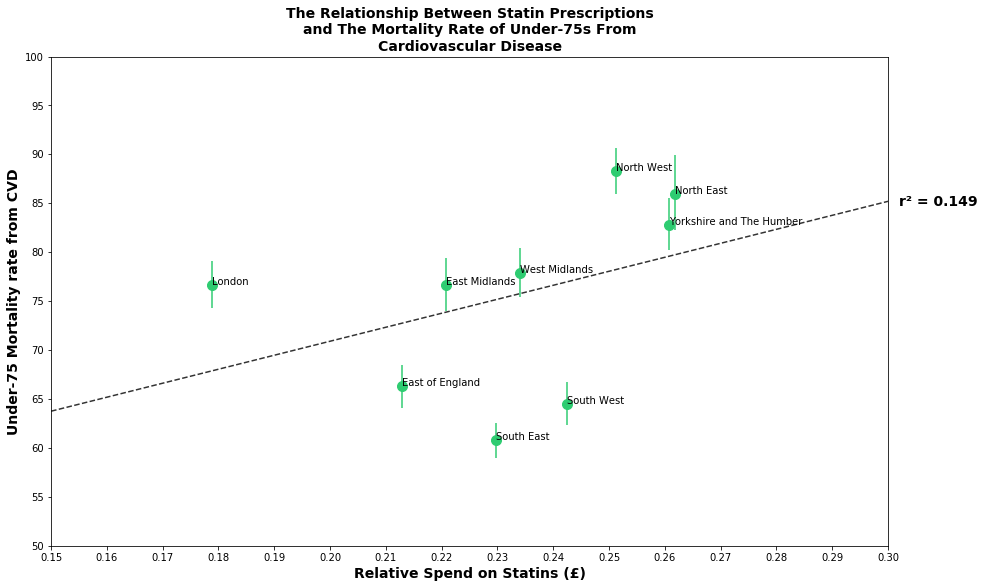

In [110]:
axes = plt.gcf()

plot_df = cvd75_and_statins
x_val = plot_df['relative statin spend']
y_val = plot_df['indicator_value']

point_labels = list(plot_df.index.values)
point_colour = '#2ECC71'

bold_dict = {'size': 14,
             'weight': 'bold'}

plt.scatter(x_val, y_val, c=point_colour, s=100)

for i, j in enumerate(point_labels):
    plt.annotate(j, (plot_df['relative statin spend'][i],
                     plot_df['indicator_value'][i]))

axes.set_size_inches(15, 9)
plt.title('The Relationship Between Statin Prescriptions\nand ' +
          'The Mortality Rate of Under-75s From\nCardiovascular Disease',
          fontdict=bold_dict)
plt.xlabel('Relative Spend on Statins (£)', fontdict=bold_dict)
plt.ylabel('Under-75 Mortality rate from CVD', fontdict=bold_dict)
plt.xlim(0.15, 0.30)
plt.ylim(50, 100)
plt.yticks([50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.xticks([0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25,
            0.26, 0.27, 0.28, 0.29, 0.30])


plot_line(x_val, y_val, 'k', '--', 'Linear Regression')

text_box = 'r² = %.3f' % (stats.linregress(x_val, y_val)[2] ** 2)

axes.text(0.91, 0.65, s=text_box, fontdict=bold_dict)

y_error_vals = ([abs(y_val - plot_df['lower_ci']),
                 abs(y_val - plot_df['upper_ci'])])

plt.gca().errorbar(x_val, y_val, yerr=y_error_vals, fmt='none', c=point_colour)

In [111]:
y_error_vals

[level_description
 East Midlands               2.7
 East of England             2.2
 London                      2.4
 North East                  3.7
 North West                  2.3
 South East                  1.8
 South West                  2.2
 West Midlands               2.5
 Yorkshire and The Humber    2.6
 dtype: float64, level_description
 East Midlands               2.7
 East of England             2.2
 London                      2.4
 North East                  3.9
 North West                  2.4
 South East                  1.7
 South West                  2.2
 West Midlands               2.5
 Yorkshire and The Humber    2.7
 dtype: float64]

In [112]:
np.corrcoef(cvd75_and_statins['relative statin spend'],
             cvd75_and_statins['indicator_value'])[1,0]

0.38596523249798698

In [113]:
stats.linregress(cvd75_and_statins['relative statin spend'],
                cvd75_and_statins['indicator_value'])

LinregressResult(slope=143.00059713872236, intercept=42.306290877447367, rvalue=0.38596523249798703, pvalue=0.30490228877539571, stderr=129.18535845281315)

When London is exluded from the dataset, a stronger correlation emerges between relative spend on statins and under 75 mortality from CVD. Is London an anomoly?

In [114]:
cvd_no_london = cvd75_and_statins.loc[cvd75_and_statins.index != 'London']
np.corrcoef(cvd_no_london['relative statin spend'],
             cvd_no_london['indicator_value'])[1,0]

0.65407151461153201

In [115]:
stats.linregress(cvd_no_london['relative statin spend'],
                cvd_no_london['indicator_value'])

LinregressResult(slope=376.87123794852909, intercept=-14.743265635852438, rvalue=0.65407151461153201, pvalue=0.078497647008274968, stderr=177.93543212170667)

<Container object of 3 artists>

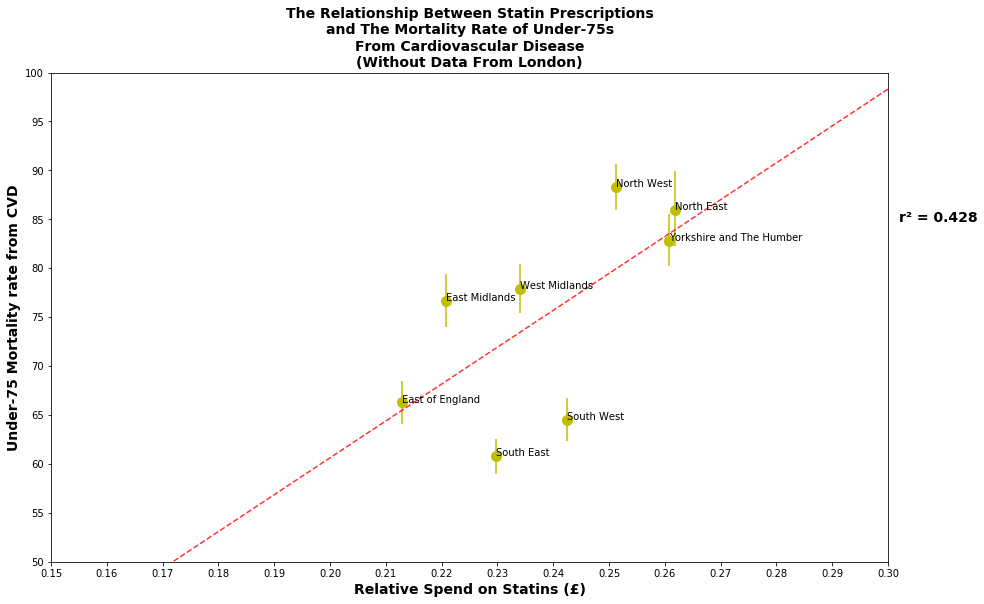

In [116]:
axes = plt.gcf()

plot_df = cvd_no_london
x_val = plot_df['relative statin spend']
y_val = plot_df['indicator_value']

point_labels = list(plot_df.index.values)
point_colour = 'y'

bold_dict = {'size': 14,
             'weight': 'bold'}

plt.scatter(x_val, y_val, c=point_colour, s=100)

for i, j in enumerate(point_labels):
    plt.annotate(j, (plot_df['relative statin spend'][i],
                     plot_df['indicator_value'][i]))

axes.set_size_inches(15, 9)
plt.title('The Relationship Between Statin Prescriptions\nand ' +
          'The Mortality Rate of Under-75s\nFrom Cardiovascular Disease\n' +
          '(Without Data From London)', fontdict=bold_dict)
plt.xlabel('Relative Spend on Statins (£)', fontdict=bold_dict)
plt.ylabel('Under-75 Mortality rate from CVD', fontdict=bold_dict)
plt.xlim(0.15, 0.30)
plt.ylim(50, 100)
plt.yticks([50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.xticks([0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25,
            0.26, 0.27, 0.28, 0.29, 0.30])


plot_line(x_val, y_val, 'r', '--', 'Linear Regression')

text_box = 'r² = %.3f' % (stats.linregress(x_val, y_val)[2] ** 2)

axes.text(0.91, 0.65, s=text_box,
          fontdict=bold_dict)

y_error_vals = ([abs(y_val - plot_df['lower_ci']),
                 abs(y_val - plot_df['upper_ci'])])

plt.gca().errorbar(x_val, y_val, yerr=y_error_vals, fmt='none', c=point_colour)

***

# Assignment D

## 1.

For this assignment, I will be importing Google flu trend data for Germany and Chile. As these datasets are stored in a `.txt` format, I will use the `pandas.read_table()` function. As `.txt` and `.csv` are both 'flat files', the data is parsed in a simmilar manner and can take the same arguments and parsing options. In both datasets, the headers are on the 8th row and the first column contains dates in a format, easily recognised and parsed by pandas. Instead of using the `pandas.to_datetime` function, less code is required to parse the date column as a datetime series during the reading in stage.



In [117]:
germany_flu = \
    pd.read_table('https://www.google.org/flutrends/' +
                  'about/data/flu/de/data.txt',
                  sep=',', header=8, parse_dates=[0])
germany_flu.set_index('Date', inplace=True)

chile_flu = \
    pd.read_table('https://www.google.org/flutrends/' +
                  'about/data/flu/cl/data.txt',
                  sep=',', header=8, parse_dates=[0])
chile_flu.set_index('Date', inplace=True)

In [118]:
print('Germany date format: %s\nChile date format: %s'
      % (germany_flu.index.dtype, chile_flu.index.dtype))

Germany date format: datetime64[ns]
Chile date format: datetime64[ns]


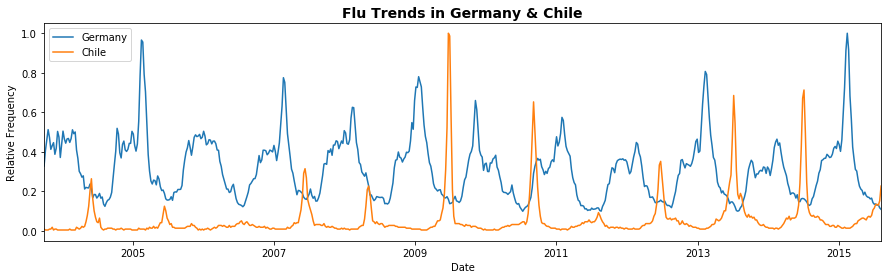

In [119]:
axes = plt.gcf()
date = germany_flu.index.values

# Both the data for flu trends in Germany and Chile were divided
# by their maximum value to normalise the data.
plt.plot(germany_flu['Germany']/max(germany_flu['Germany']))
plt.plot(chile_flu['Chile']/max(chile_flu['Chile']))
plt.legend()


plt.xlim(min(date), max(date))
plt.title('Flu Trends in Germany & Chile', fontdict=bold_dict)
plt.xlabel('Date')
plt.ylabel('Relative Frequency')

axes.set_size_inches(15, 4)

Same plot, with a smoother line:

C:\Users\Khaled\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """
C:\Users\Khaled\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  import sys


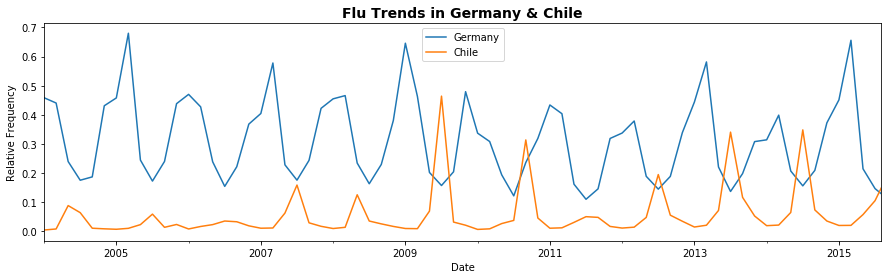

In [120]:
axes = plt.gcf()

# Resampling both plots with a trailing mean of
# 2 months to give a smoother line
(germany_flu['Germany']/max(germany_flu['Germany']))\
    .resample('2M', how='mean').plot()

(chile_flu['Chile']/max(chile_flu['Chile']))\
    .resample('2M', how='mean').plot()

plt.legend()
plt.xlim(pd.Timestamp('2004-01-01'), pd.Timestamp('2015-08-01'))
plt.title('Flu Trends in Germany & Chile', fontdict=bold_dict)
plt.xlabel('Date')
plt.ylabel('Relative Frequency')

axes.set_size_inches(15, 4)

## 2.